# **Customer Churn Analysis**

**Problem Statement:**

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

**Getting Started**

In [ ]:
# Importing all necessary libraries and packages 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Reading the CSV file from the Churn_Analysis Dataset

Chur = pd.read_csv('/content/drive/MyDrive/Python_Datasets/Telecom_customer_churn.csv')

In [ ]:
#Examining the Data
Chur

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0     7590-VHVEG  Female              0  ...          29.85        29.85     No
1     5575-GNVDE    Male              0  ...          56.95       1889.5     No
2     3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3     7795-CFOCW    Male              0  ...          42.30      1840.75     No
4     9237-HQITU  Female              0  ...          70.70       151.65    Yes
...          ...     ...            ...  ...            ...          ...    ...
7038  6840-RESVB    Male              0  ...          84.80       1990.5     No
7039  2234-XADUH  Female              0  ...         103.20       7362.9     No
7040  4801-JZAZL  Female              0  ...          29.60       346.45     No
7041  8361-LTMKD    Male              1  ...          74.40        306.6    Yes
7042  3186-AJIEK    Male              0  ...         105.65       6844.5     No

[7043 rows x 21 columns]

In [ ]:
#Display all columns 
Chur.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Display top 5 rows of the Dataset
Chur.head()

customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

In [ ]:
#Check all information of the Dataset
Chur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observation :**
There are both numerical and object type variable present in the Dataset , whereas Churn is our Target Variable in which we have classes .

In [ ]:
#Converting TotalCharges to numeric 
Chur.TotalCharges = pd.to_numeric(Chur.TotalCharges, errors='coerce')

In [ ]:
#Check the shape of the Dataset
Chur.shape

(7043, 21)

**Observation :**
This shows 21 columns and 7043 rows in dataset .

In [ ]:
#Description of the Dataset
Chur.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [ ]:
#Checking all Null_Values
Chur.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**From the above output, it can be seen that, there are 11 missing values for Total Charges.**

In [ ]:
# Filling all Missing Values
Chur['TotalCharges']=Chur['TotalCharges'].fillna(Chur['TotalCharges'].mean())
Chur.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Now there are no null values present in the Dataset .**

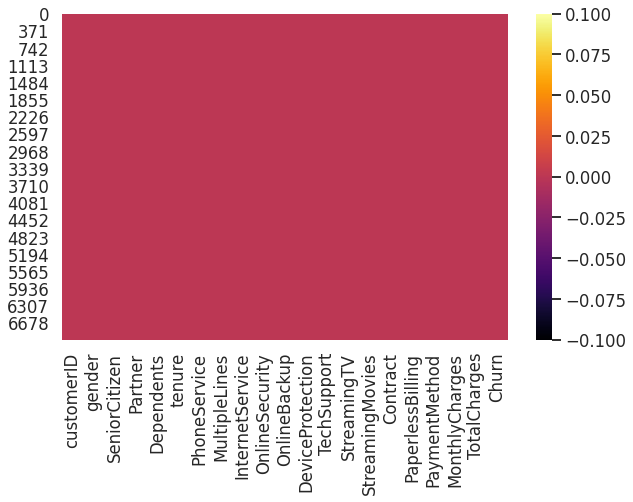

In [ ]:
#Checking for Null Values by passing a HeatMap_Function
sns.heatmap(Chur.isnull(),cmap='inferno')

In [ ]:
#Checking all unique values in every column of the Dataset
Chur.apply(lambda x: len(x.unique()))

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

**Observation :**
There are no useless features in the Dataset .

In [ ]:
#Removing cusomer IDs from the data set as it is not needed for predicting model
Chur = Chur.drop('customerID',axis=1)
Chur.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#Checking Unique values in Churn
Chur.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines     InternetService  OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies      Contract        PaperlessBilling  PaymentMethod              MonthlyCharges  TotalCharges  Churn
Male    0              No       No          1       Yes           No                No               No internet service  No internet service  No internet service  No internet service  No internet service  No internet service  Month-to-month  No                Mailed check               20.20           20.20         No       3
                                                                                                                                                                                                                                                                                                20.05           20.05         No       3
                  

In [ ]:
Chur['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**Observation :**
5174 customers don't churn and 1869 customers do churn  .

In [ ]:
Chur['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

**Data is almost distributed in gender column.**

# **EDA(Exploratory_Data_Analysis)**

Doing more visualization to better understand the patterns in the data and potentially form some hypothesis. First looking at the distribution of individual variables and then slice and dice the data for to check if interesting trends are present.

**1.Univariant Analysis**

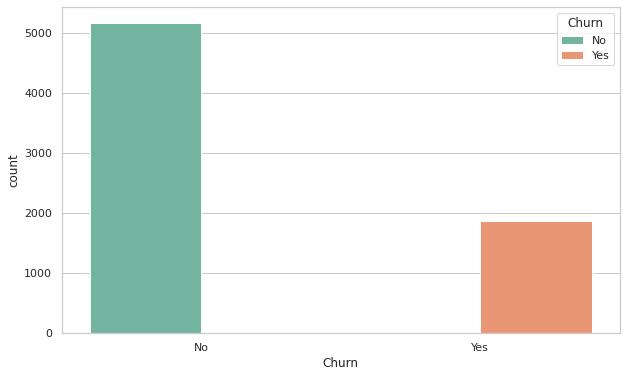

In [ ]:
# Plotting Churn Distribution
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
sns.countplot(x='Churn',data=Chur,hue='Churn',saturation=.75,palette='Set2')
plt.show()

**There is a clear class-imbalance problem presence as more number of customers do not churn .**

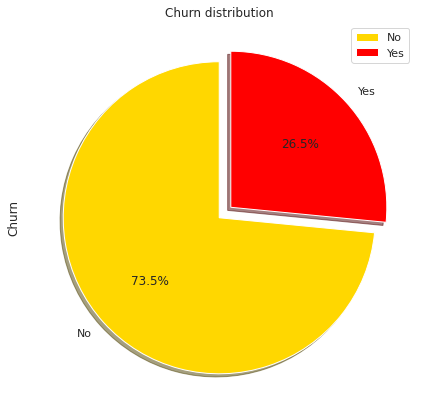

In [ ]:
f, ax = plt.subplots(figsize=(8, 6))
order = list(Chur['Churn'].value_counts().index)

#pop_labels = ['3','4','5','6','7','8']
colors = ['gold','red']
explode = (0,0.1)
Chur['Churn'].value_counts().plot.pie(explode=explode , colors = colors ,startangle=90 ,autopct='%.1f%%',shadow=True, ax=ax)
ax.set_title('Churn distribution');
ax.legend(loc = "upper right") 
plt.tight_layout() 
plt.show()

**Observation :** 5174 customers don't churn and 1869 customers do churn . Clearly there is a class imbalance problem , which will be removed later .

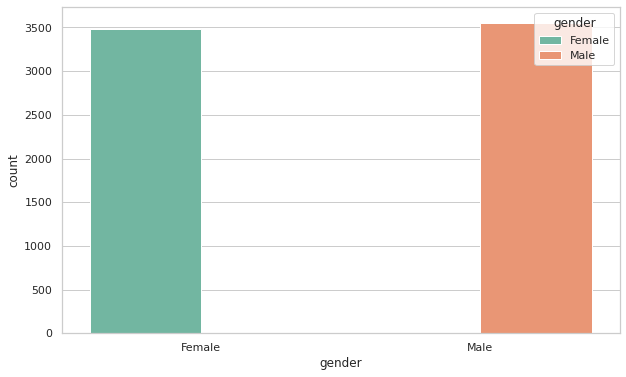

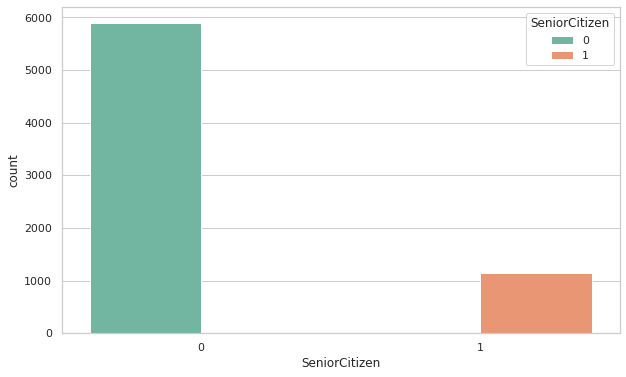

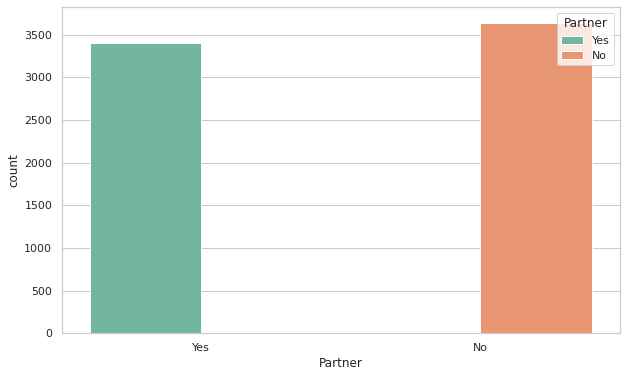

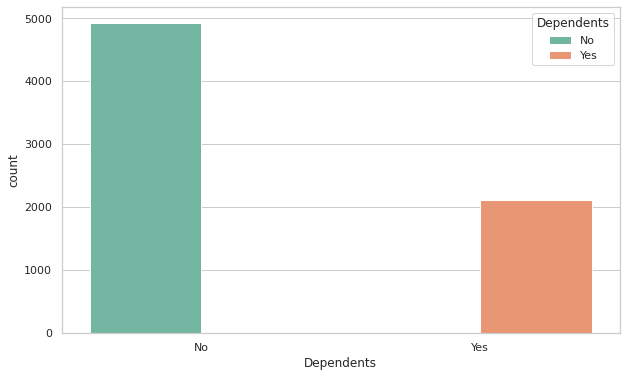

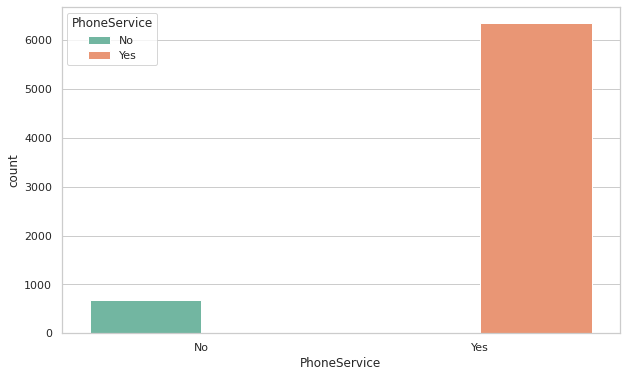

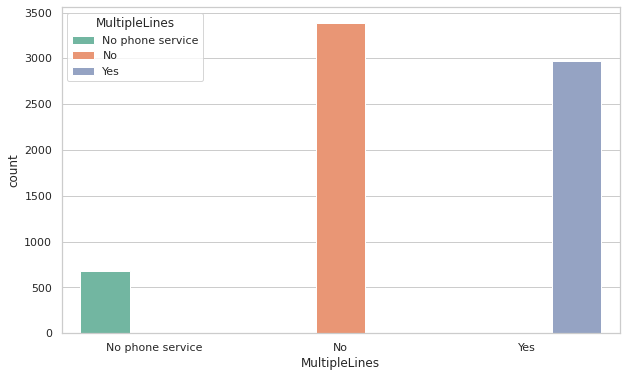

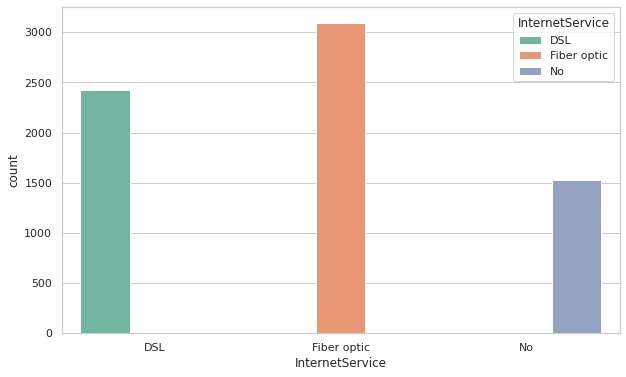

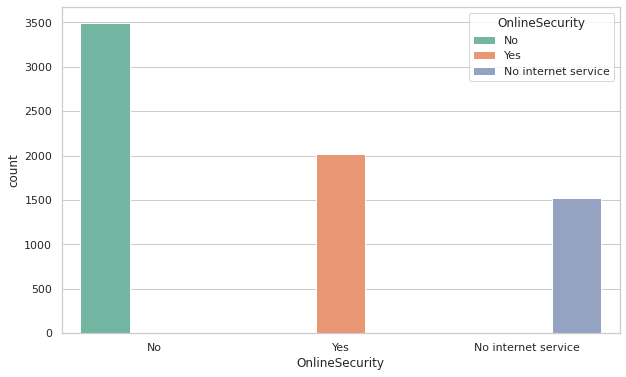

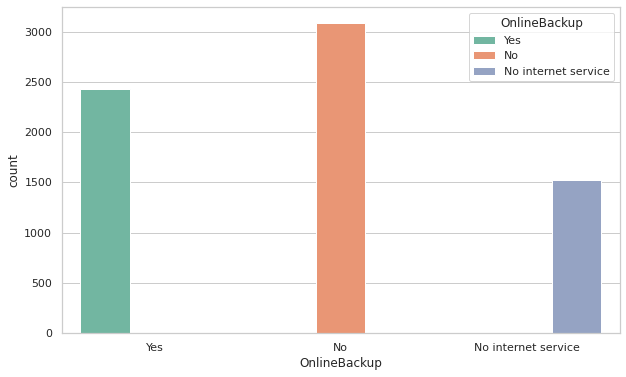

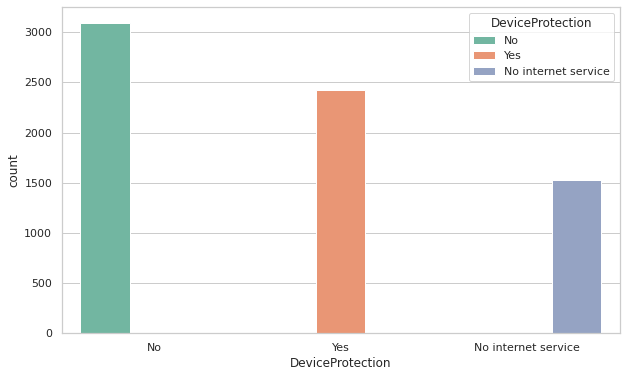

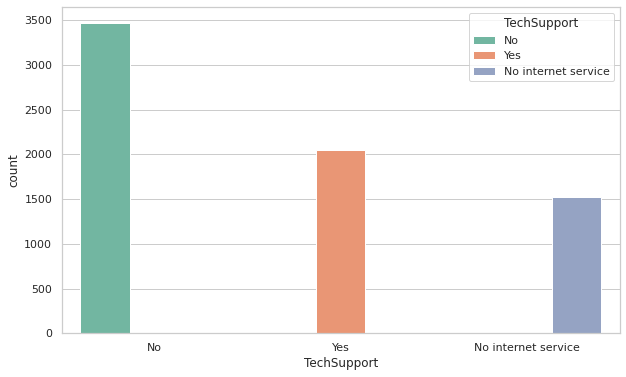

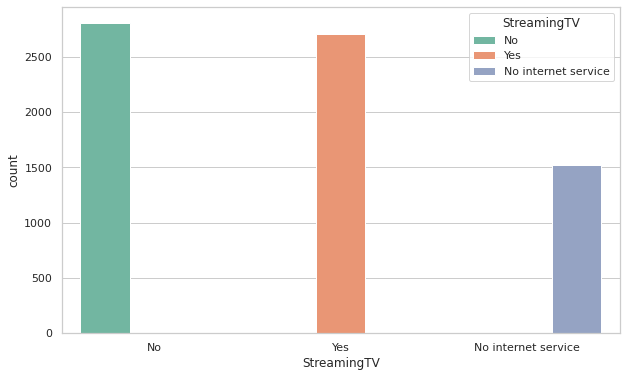

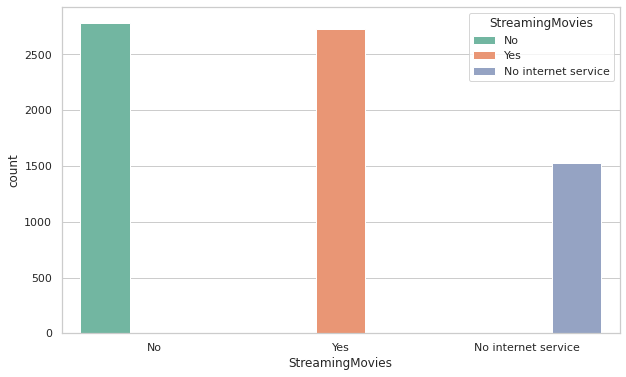

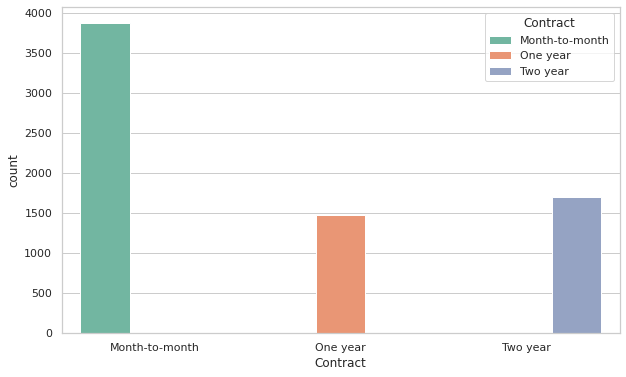

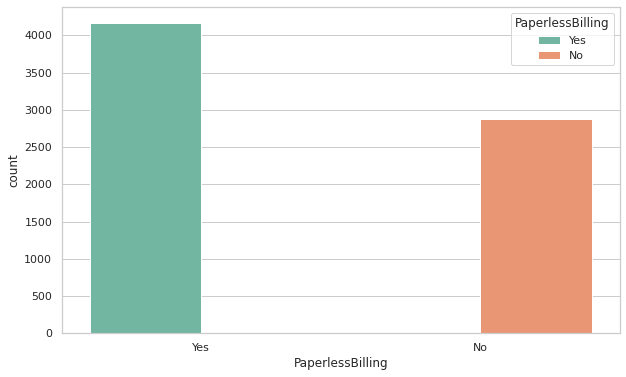

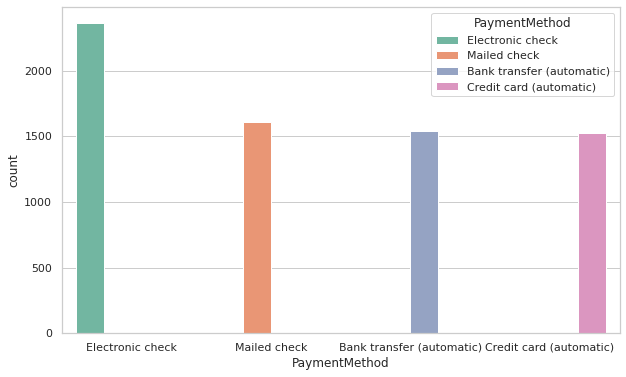

In [ ]:
COL = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

for i in COL:
  plt.figure(figsize=(10,6))
  sns.countplot(x=i,data=Chur,hue=i,saturation=.75,palette='Set2')
  plt.show()

**Observation :**

1. Less number of customers lie in Senior-Citizen group .
2. More number of customers are dependent.
3. More number of customers have Phnone-Services .
4. More number of customers have fiber-optic as Internet Service .
5. More number of customers have no Online Security .
6. More number of customers donot have Device-Protection . 
7. More number of customers donot have Tech-Support .
8. More number of customers donot have streaming TV .
9. More number of customers have Month-to-Month Contract . 
10. More number of customers have Paper-less billing .
11. More number of customers have Electronic check as Payment Method .

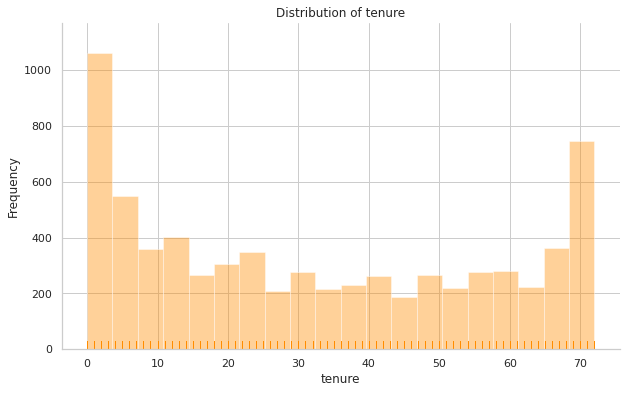

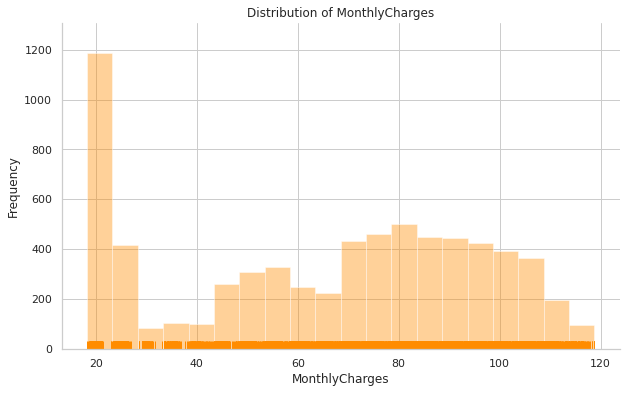

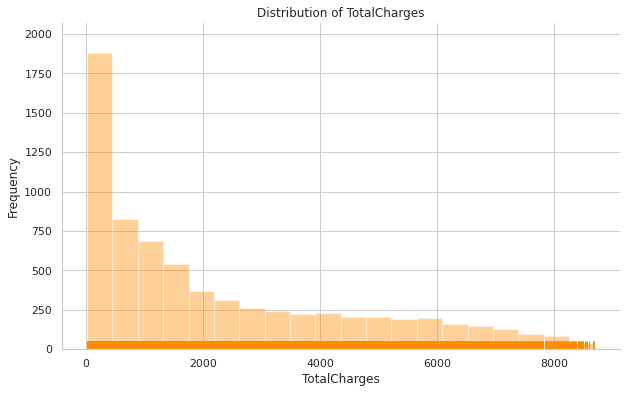

In [ ]:
#this function is used for plotting the distribution of numerical variable

def dist_num(Chur, col):
    plt.figure()
    
    sns.distplot(Chur, kde=False, bins=20,color='darkorange', rug=True );
    plt.title("Distribution of "+str(col))
    plt.ylabel("Frequency")
    sns.despine()
    
col_num = ["tenure", "MonthlyCharges", "TotalCharges"]

num = [dist_num(Chur[col], col) for col in col_num]

**Observation :**

1. The monthly charge has 3 modals, this may be due to three different payment methods for the customers.
2. The distribution of Total Charge has a positive asymmetry, which means that only a few users have a raise value.

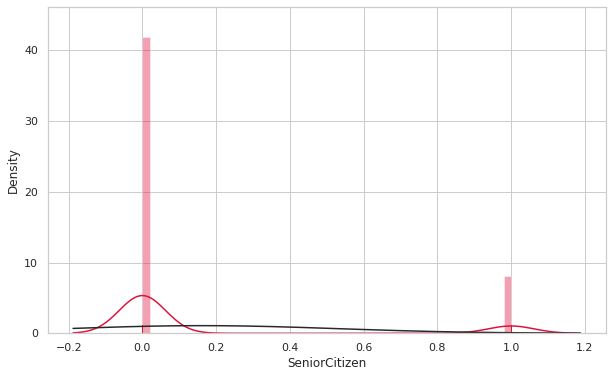

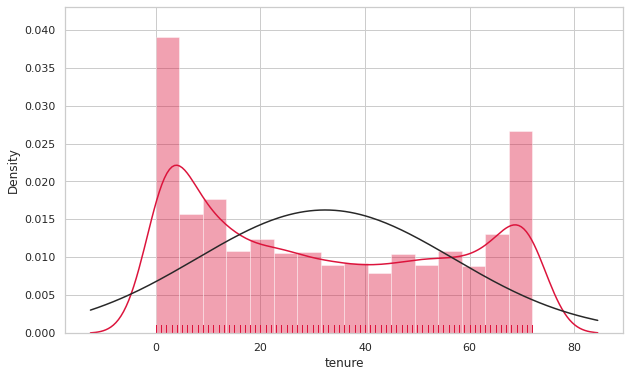

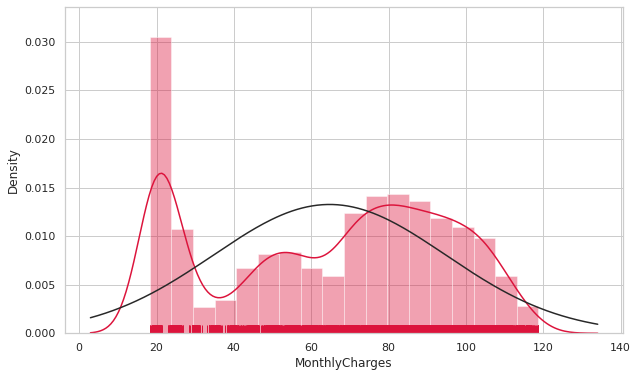

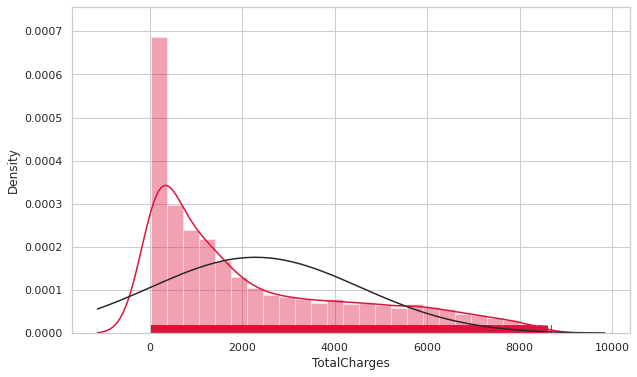

In [ ]:
#Plotting Distplot for all numerical columns
from scipy.stats import norm
cols = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']

for i in cols:
  sns.distplot(Chur[i] , rug=True , color = 'crimson' , fit=norm)
  plt.show()

**TotalCharges is left Skewed .**

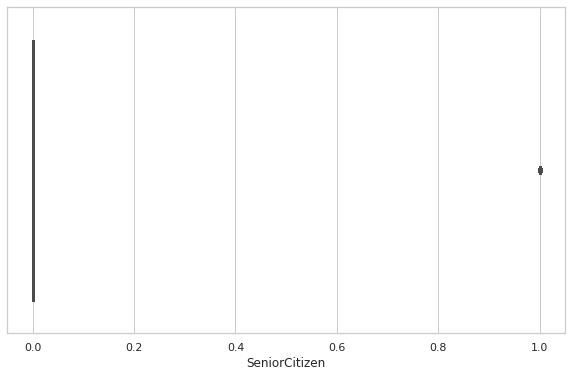

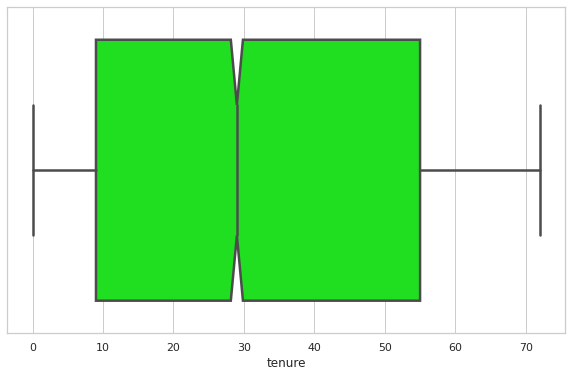

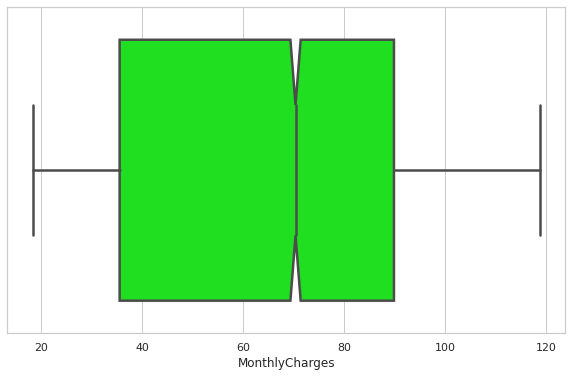

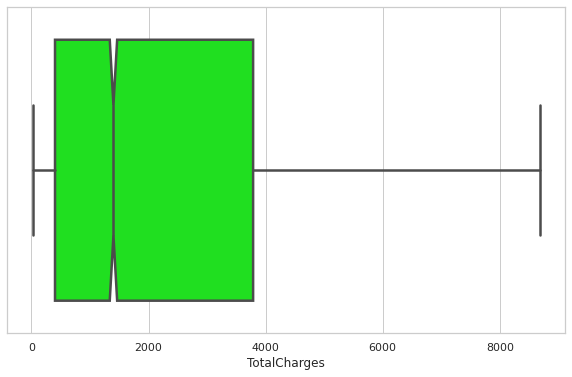

In [ ]:
for i in cols:
  sns.boxplot(Chur[i], notch=True,color='lime',linewidth=2.5)
  plt.show()

**Some outliers are present in Senior Citizen column .**

**2.Bivariate Analysis**

Let's check relationship between all attribute variables and Target variable .

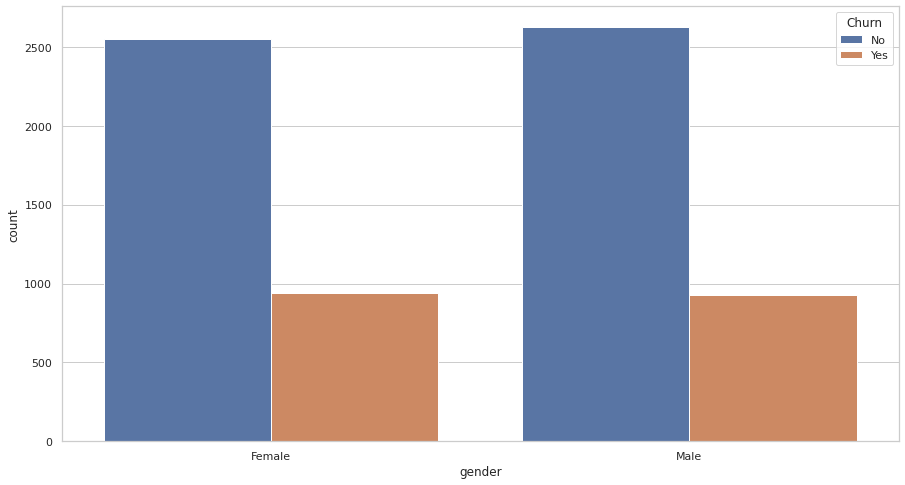

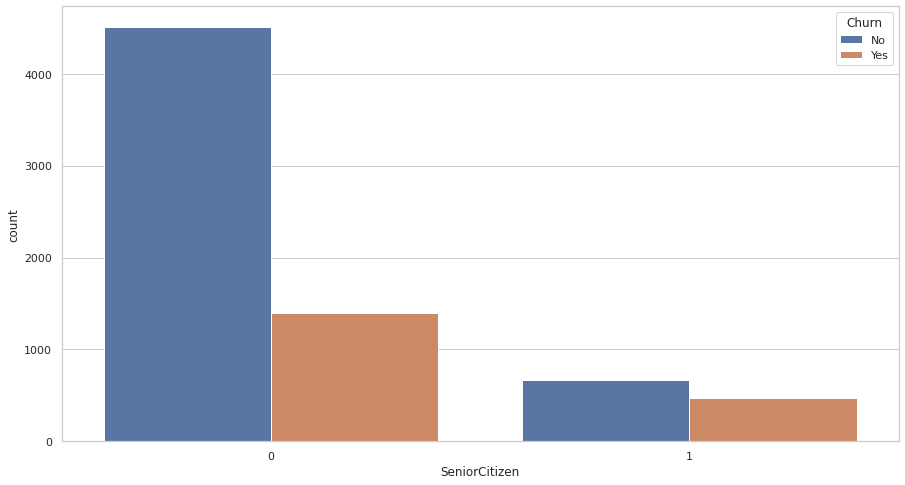

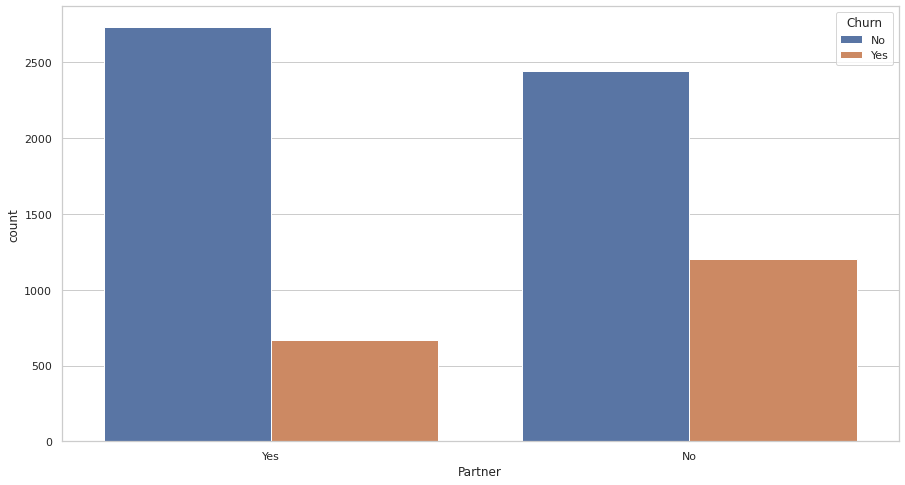

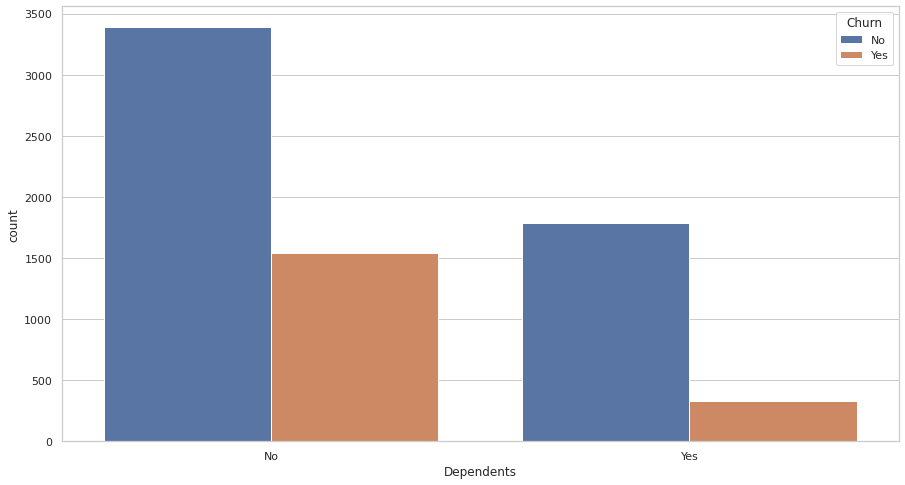

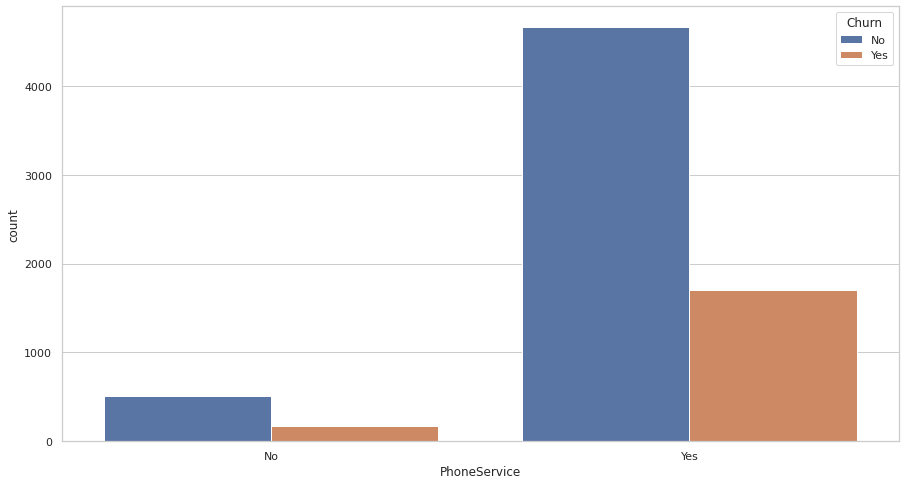

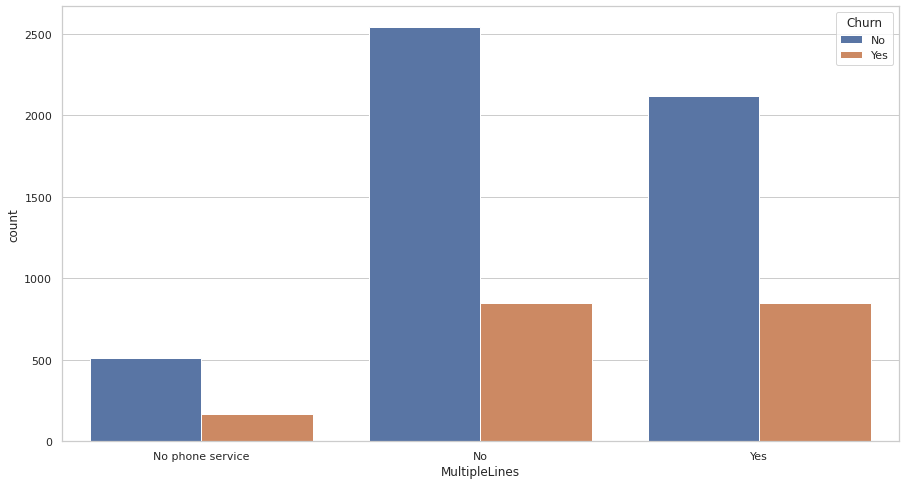

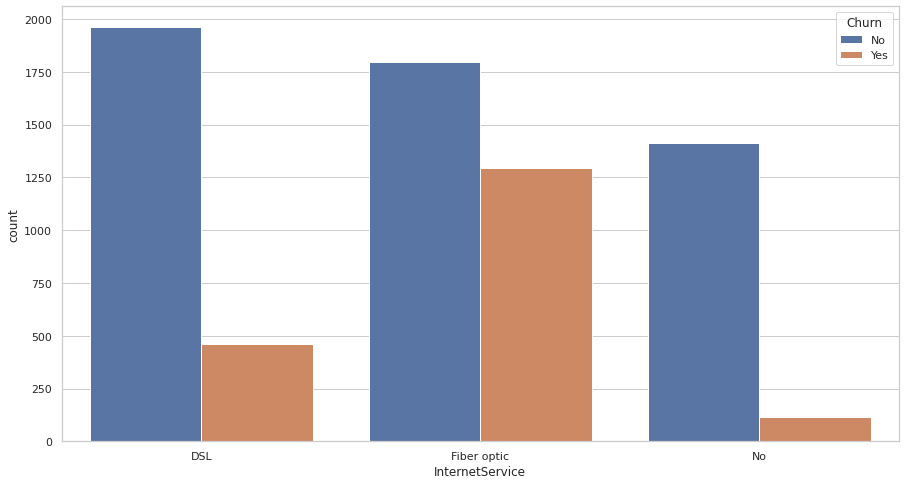

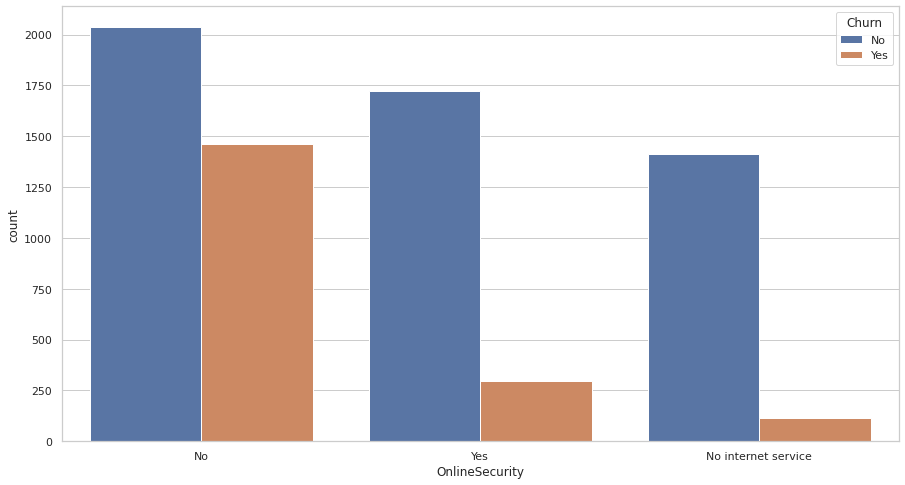

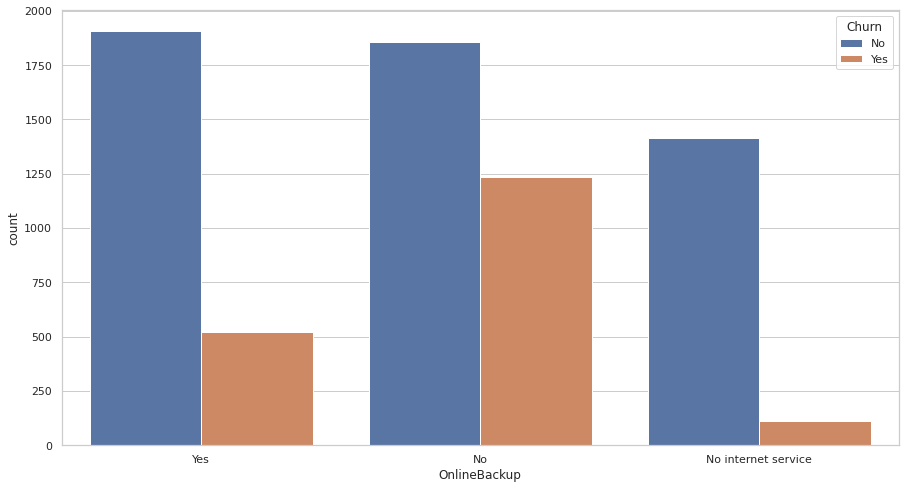

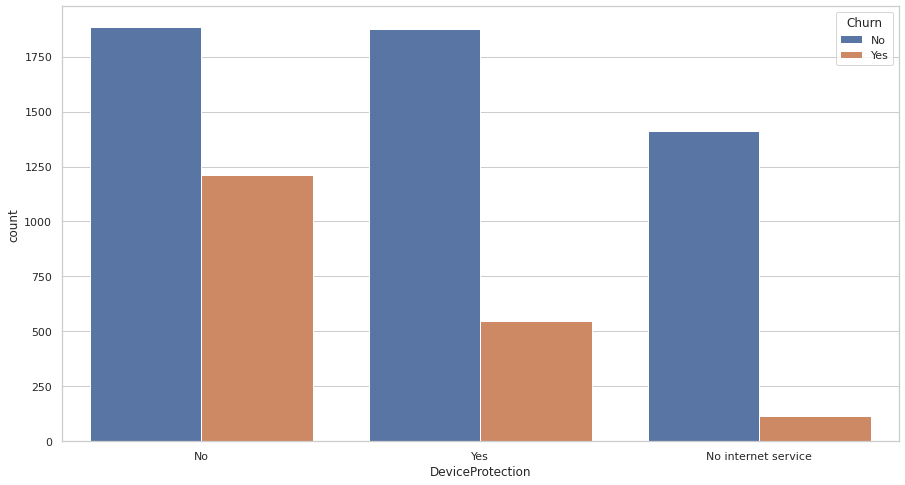

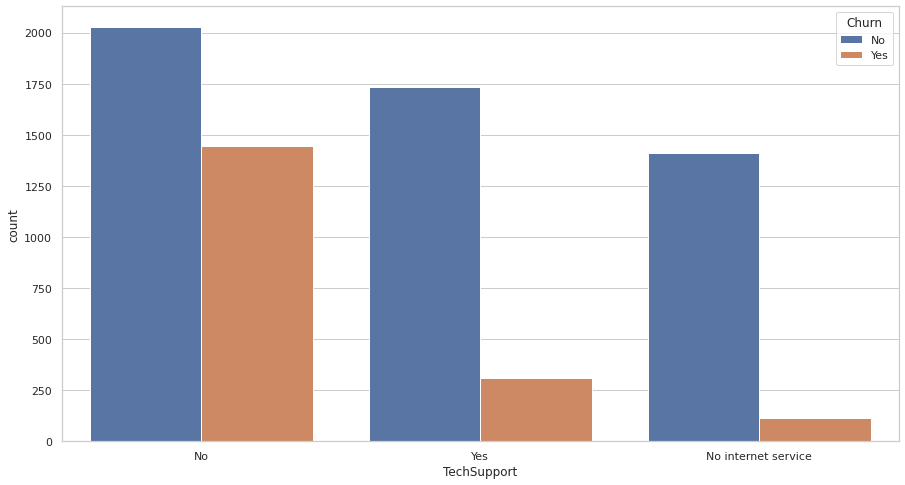

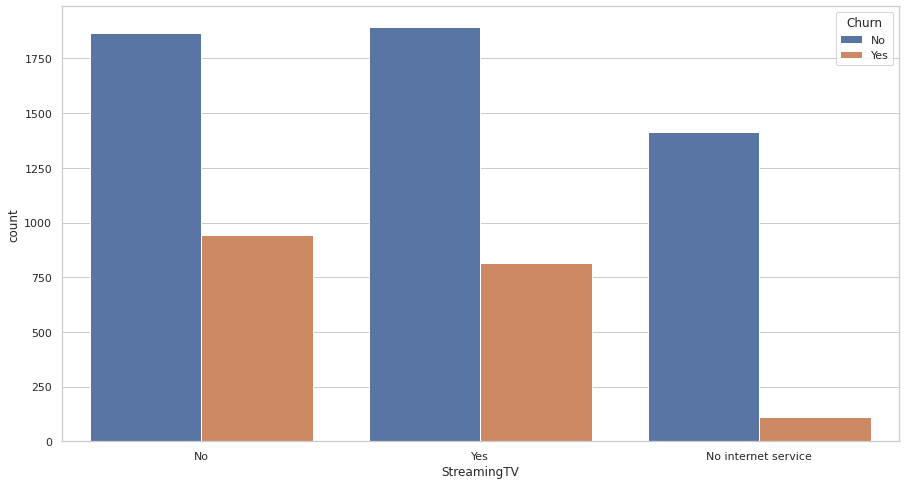

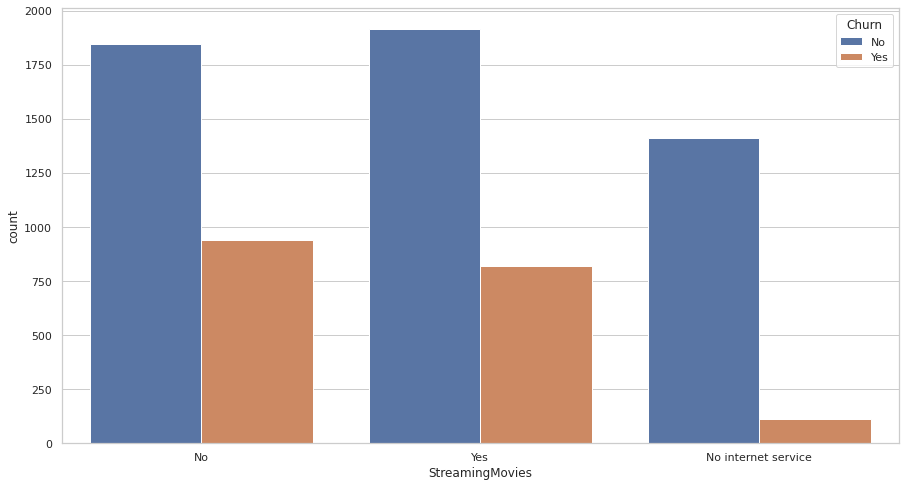

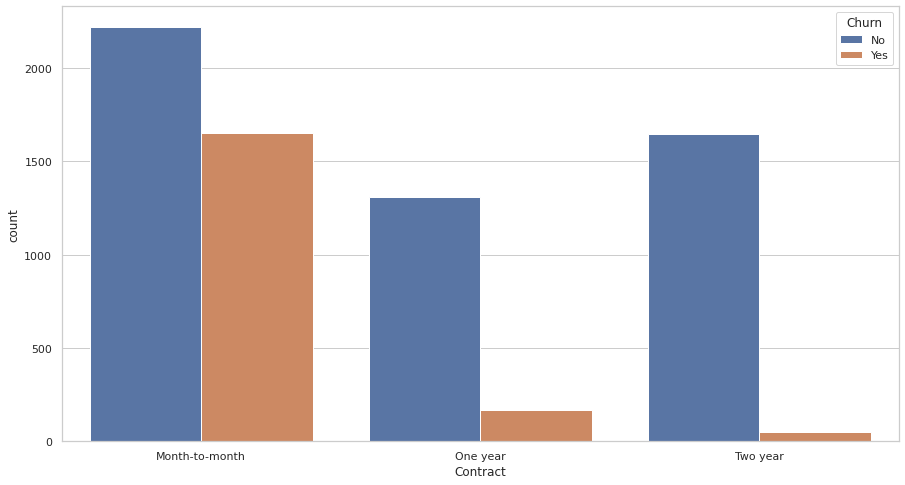

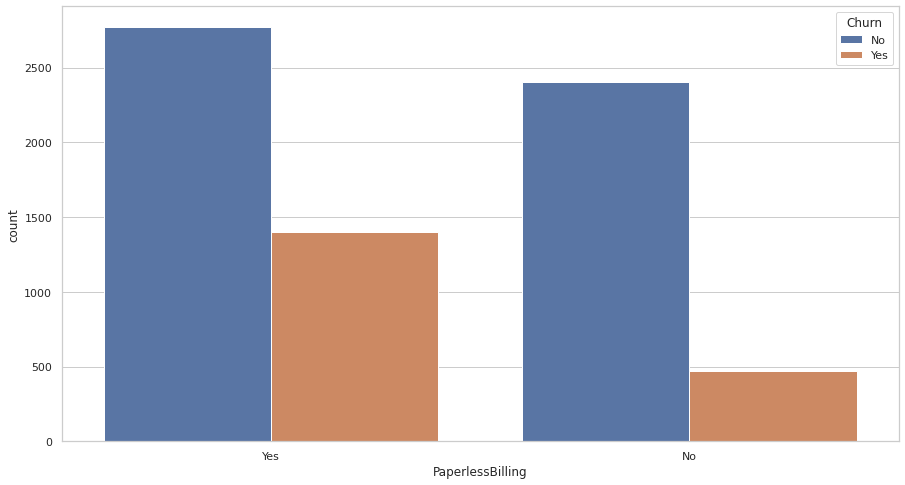

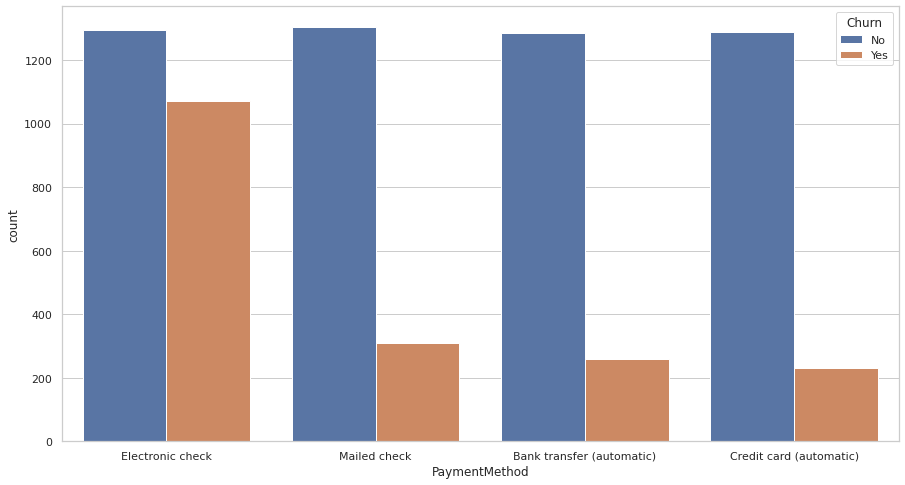

In [ ]:
for i in COL:
  plt.figure(figsize=(15,8))
  sns.countplot(Chur[i],hue=Chur.Churn)

**Observations :**

1. Above plot shows almost equal number of male and female customers; 50.5% are male customers while the other 49.5% are female.
2. Below pie chart shows 16.2% senior citizens customer. Thus most of the customers in the data are younger people.
3. From above plot, it can be seen that, 48% of the customers have a partner channel, while only 30% of the total customers have dependents.
4. Interestingly, among the customers who have a partner, only about half of them (51%) also have a dependent, while other half (49%) do not have any independents. Additionally, as expected, among the customers who do not have any partner, a majority (90%) of them do not have any dependents
5. 26.5% churn rate is cosidered quite high. However, 73.5 % of the customers do not churn. Clearly the data is skewed as it is always expected that a large majority of the customers to not churn.
6. A review of any differences between the % of customers with/without dependents and partners by gender reveal that, there is no difference in their distribution by gender. Additionally, there is no difference in senior citizen status by gender.

**Lets check customer account information**

Text(0.5, 1.0, 'Number of Customers by tenure')

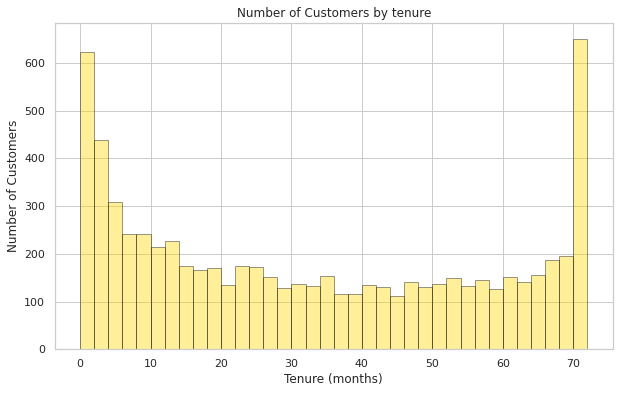

In [ ]:
rcParams['figure.figsize']=10,6
ax = sns.distplot(Chur['tenure'],hist=True,kde=False,
                  bins=int(180/5),
                  hist_kws={'edgecolor':'black'},
                  kde_kws={'linewidth':4},color = 'gold')
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Number of Customers by tenure')

**Observation :**

The above histogram displays a lot of customers have been with the telecom company for just a month, while quite a many are there for about 70 months. This could be potentially because of different contractual agrrement some customers might have.

**Lets check the customers by tenure of contract**

Text(0.5, 1.0, 'Number of Customers by Contract Type')

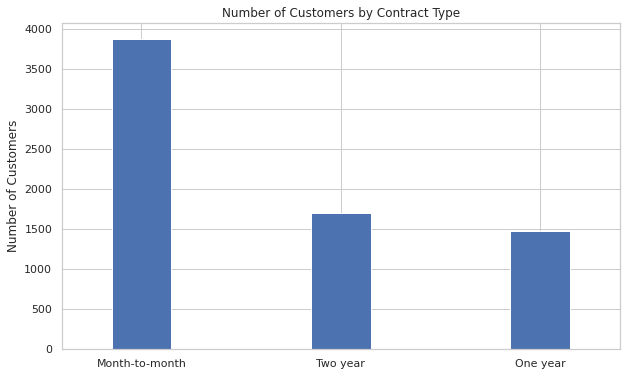

In [ ]:
ax = Chur['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('Number of Customers')
ax.set_title('Number of Customers by Contract Type')

**Observation :**

Interestingly most of the monthly contracts last for 1-2 months, while the 2 year contracts tend to last for about 70 months. This shows that the customers taking a longer contract are more loyal to the company and tend to stay with it for a longer period of time. This is also visible on the correlation chart with the churn rate. More of less equal number of customers in the 1 year and 2 year contracts; around 1500 customers are on 1 year contract and close to around 1700 customers are on 2 years contracts.

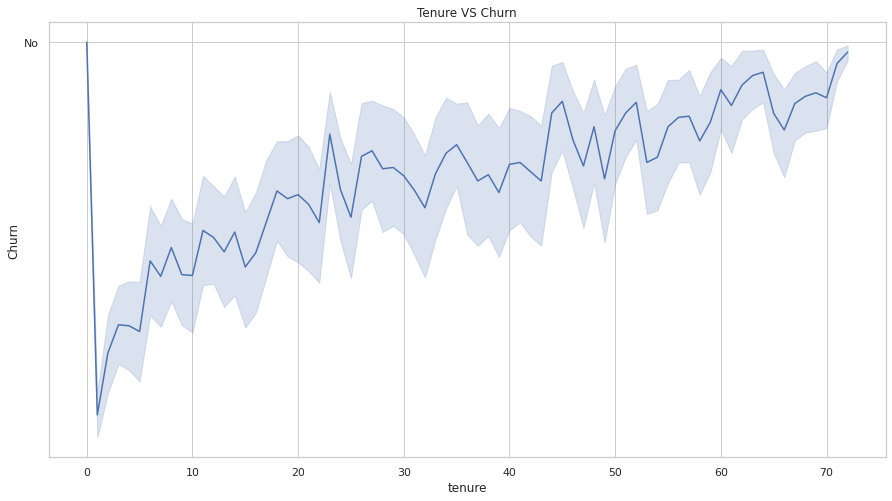

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(x = 'tenure', y = 'Churn', data=Chur)
plt.title('Tenure VS Churn')
plt.show()

In [ ]:
pip install bubble_plot


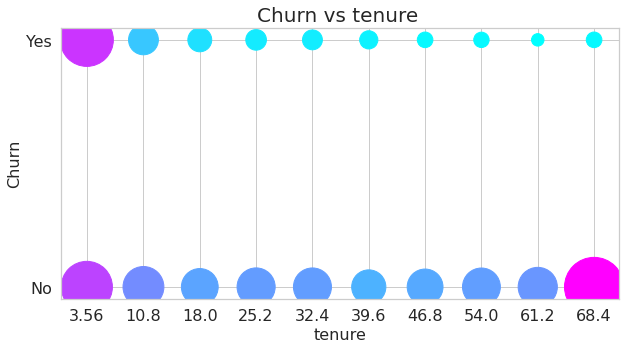

In [ ]:
from bubble_plot.bubble_plot import bubble_plot
bubble_plot(Chur,'tenure','Churn', normalization_by_all=True)

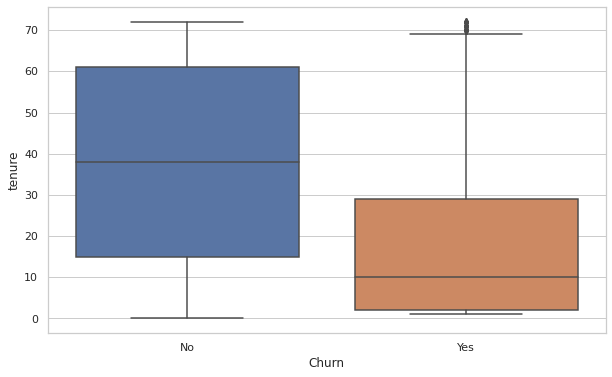

In [ ]:
sns.boxplot(x = Chur.Churn, y = Chur.tenure)

**Observation :**
We have already witnessed that, longer (over 70 months) customers are loyal to do not churn.

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

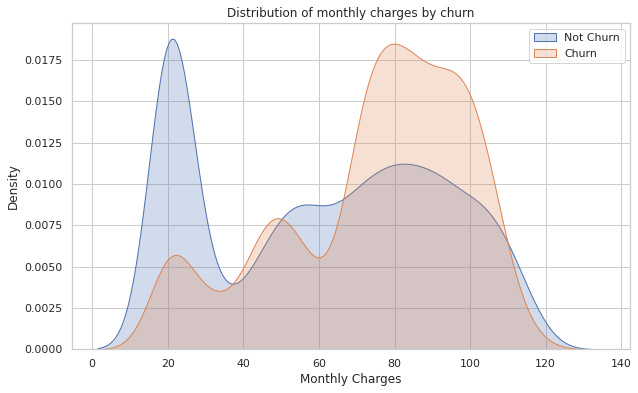

In [ ]:
ax = sns.kdeplot(Chur.MonthlyCharges[(Chur["Churn"] == 'No')], shade=True)
ax = sns.kdeplot(Chur.MonthlyCharges[(Chur["Churn"] == 'Yes') ], ax =ax, shade= True)
ax.legend(["Not Churn","Churn"], loc='best')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

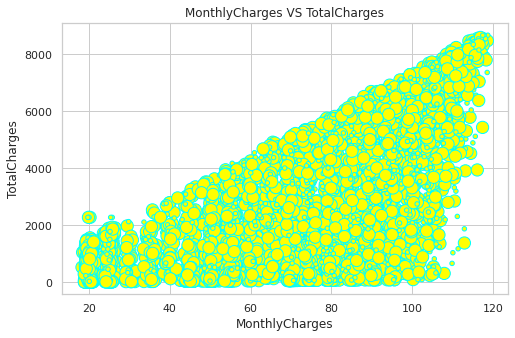

In [ ]:
#Scatter_plot showing relation between Capital_gain and Capital_loss

plt.figure(figsize=(8,5))
plt.title('MonthlyCharges VS TotalCharges')
plt.scatter(x='MonthlyCharges',y='TotalCharges',data=Chur,sizes=(20, 150),edgecolors='cyan',c='yellow',marker ="o")
plt.xlabel("MonthlyCharges")
plt.ylabel("TotalCharges")
plt.show()

# **Performing Label Encoder**

In [ ]:
Chur.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [ ]:
# Performing Label Encoder for categorical Values.

from sklearn.preprocessing import LabelEncoder

Le = LabelEncoder()
Chur['gender'] = Le.fit_transform(Chur['gender'])
Chur['Partner'] = Le.fit_transform(Chur['Partner'])
Chur['Dependents'] = Le.fit_transform(Chur['Dependents'])
Chur['PhoneService'] = Le.fit_transform(Chur['PhoneService'])
Chur['MultipleLines'] = Le.fit_transform(Chur['MultipleLines'])
Chur['InternetService'] = Le.fit_transform(Chur['InternetService'])
Chur['OnlineSecurity'] = Le.fit_transform(Chur['OnlineSecurity'])
Chur['OnlineBackup'] = Le.fit_transform(Chur['OnlineBackup'])
Chur['DeviceProtection'] = Le.fit_transform(Chur['DeviceProtection'])
Chur['TechSupport'] = Le.fit_transform(Chur['TechSupport'])
Chur['StreamingTV'] = Le.fit_transform(Chur['StreamingTV'])
Chur['StreamingMovies'] = Le.fit_transform(Chur['StreamingMovies'])
Chur['Contract'] = Le.fit_transform(Chur['Contract'])
Chur['PaperlessBilling'] = Le.fit_transform(Chur['PaperlessBilling'])
Chur['PaymentMethod'] = Le.fit_transform(Chur['PaymentMethod'])
Chur['Churn'] = Le.fit_transform(Chur['Churn'])

In [ ]:
Chur.head()

gender  SeniorCitizen  Partner  ...  MonthlyCharges  TotalCharges  Churn
0       0              0        1  ...           29.85         29.85      0
1       1              0        0  ...           56.95       1889.50      0
2       1              0        0  ...           53.85        108.15      1
3       1              0        0  ...           42.30       1840.75      0
4       0              0        0  ...           70.70        151.65      1

[5 rows x 20 columns]

In [ ]:
#Checking Uniqueness in all columns

print("Total number of unique values in each feature:")
for col in Chur.columns.values:
    print("Number of unique values of {} : {}".format(col, Chur[col].nunique()))

Total number of unique values in each feature:
Number of unique values of gender : 2
Number of unique values of SeniorCitizen : 2
Number of unique values of Partner : 2
Number of unique values of Dependents : 2
Number of unique values of tenure : 73
Number of unique values of PhoneService : 2
Number of unique values of MultipleLines : 3
Number of unique values of InternetService : 3
Number of unique values of OnlineSecurity : 3
Number of unique values of OnlineBackup : 3
Number of unique values of DeviceProtection : 3
Number of unique values of TechSupport : 3
Number of unique values of StreamingTV : 3
Number of unique values of StreamingMovies : 3
Number of unique values of Contract : 3
Number of unique values of PaperlessBilling : 2
Number of unique values of PaymentMethod : 4
Number of unique values of MonthlyCharges : 1585
Number of unique values of TotalCharges : 6531
Number of unique values of Churn : 2


**3.Multi-Variant Analysis**

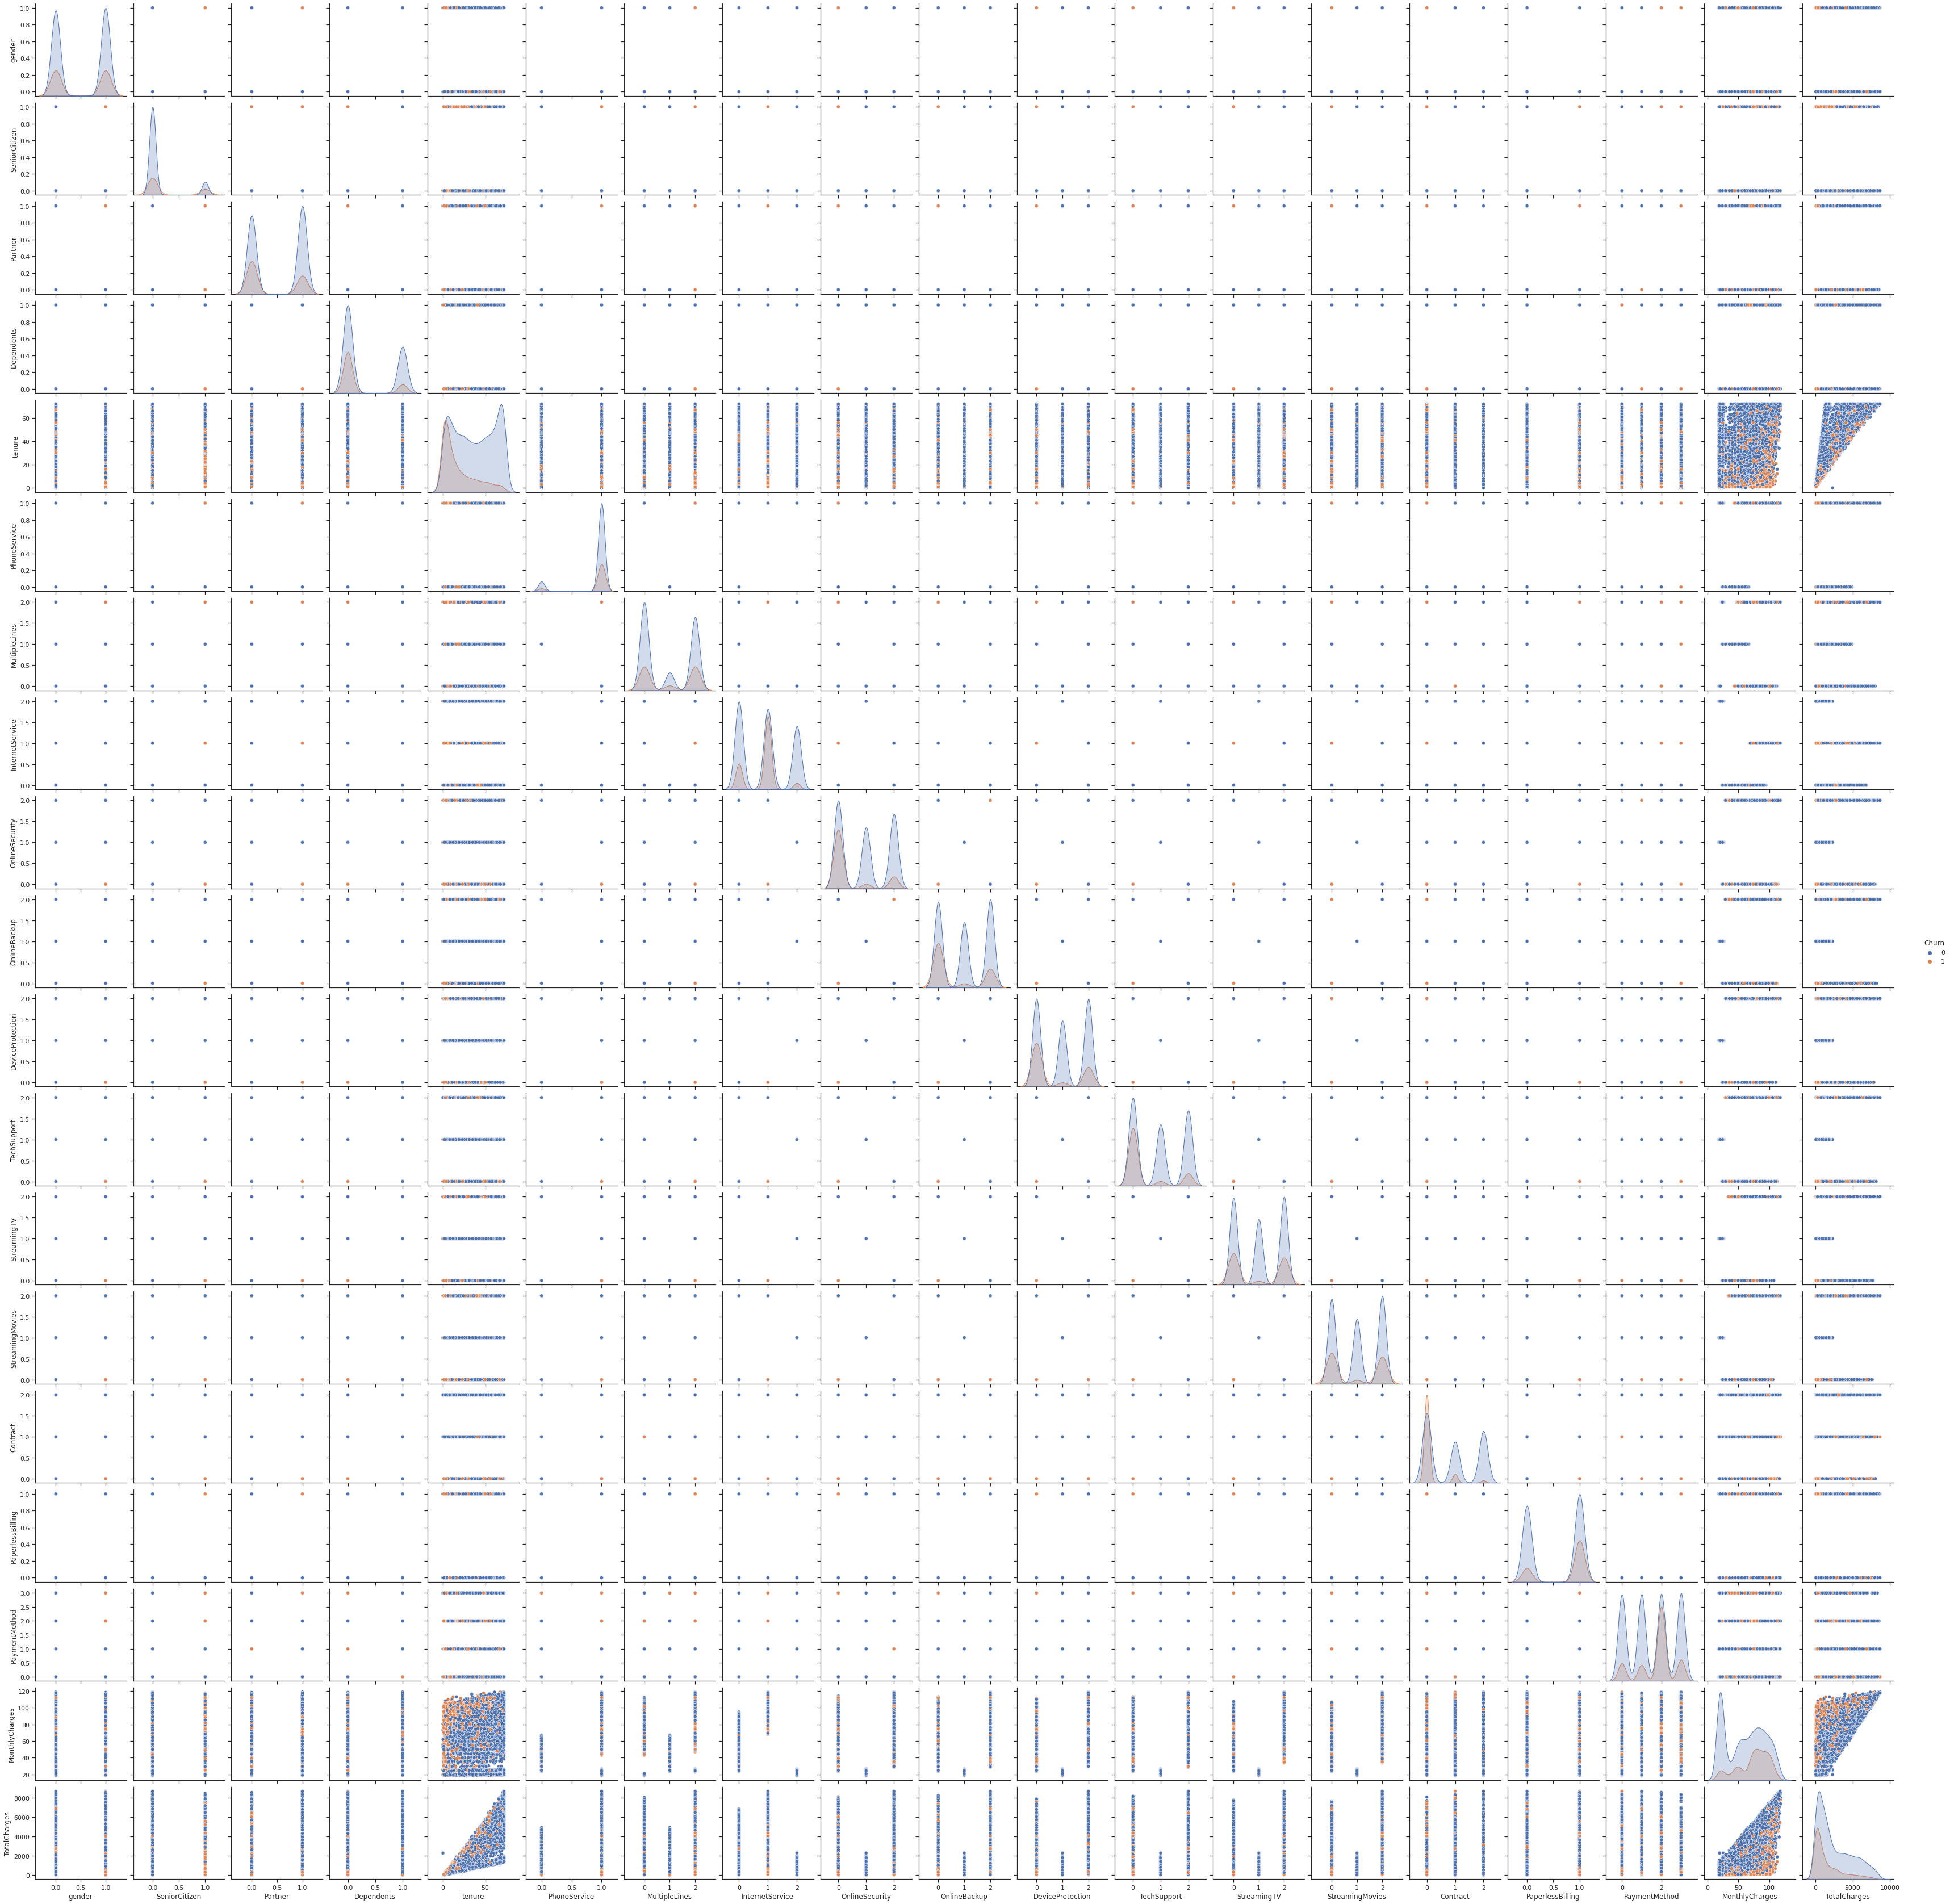

In [ ]:
sns.set(style='ticks')
sns.pairplot(Chur,hue='Churn')

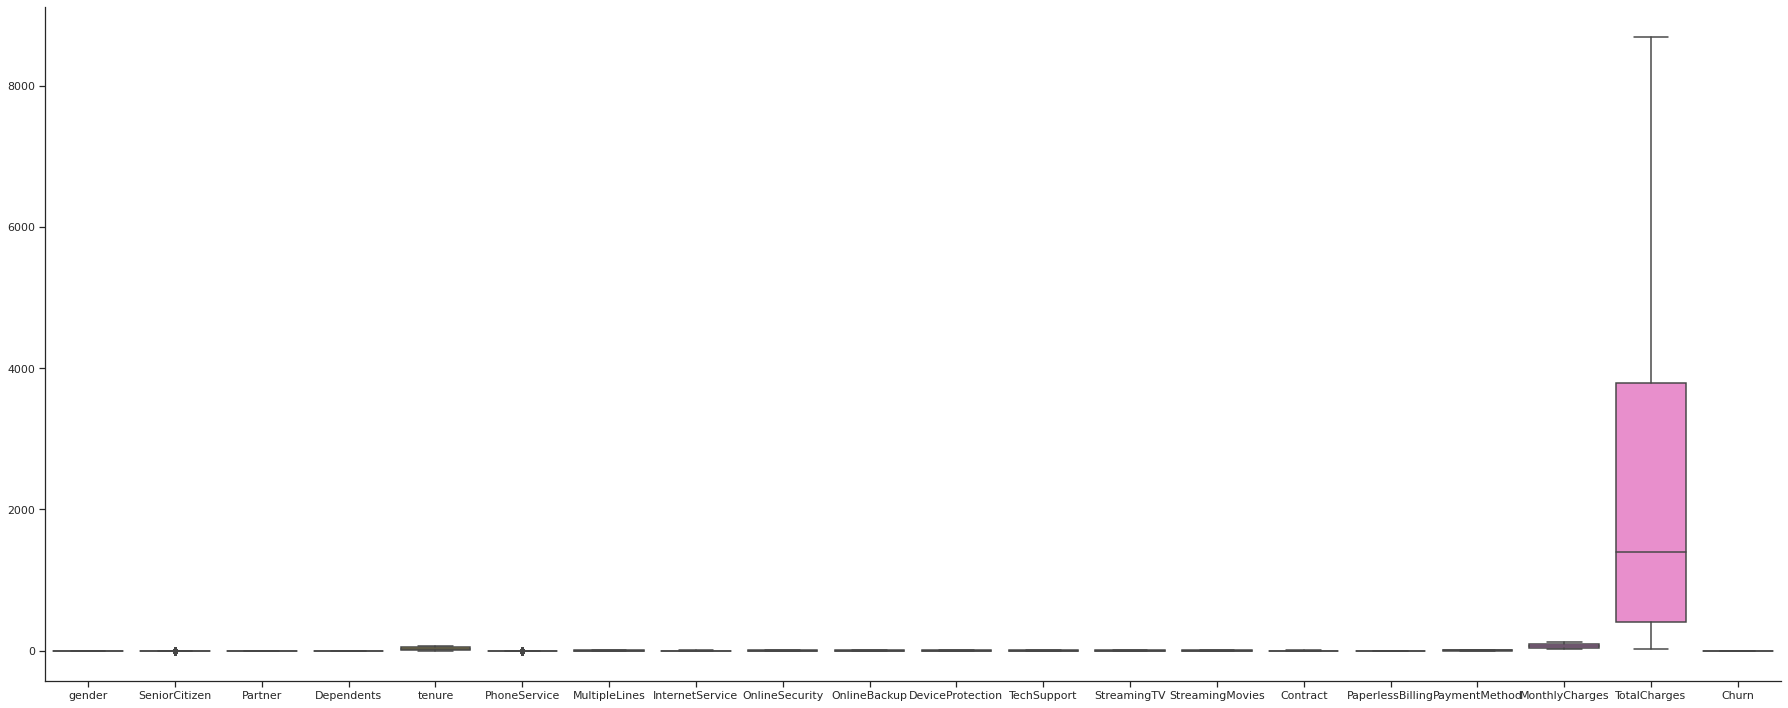

In [ ]:
sns.factorplot(data=Chur,kind='box',size=10,aspect=2.5)

**Checking Correlation between Variables**

In [ ]:
cor = Chur.corr()
cor

gender  SeniorCitizen  ...  TotalCharges     Churn
gender            1.000000      -0.001874  ...      0.000048 -0.008612
SeniorCitizen    -0.001874       1.000000  ...      0.102395  0.150889
Partner          -0.001808       0.016479  ...      0.318812 -0.150448
Dependents        0.010517      -0.211185  ...      0.064535 -0.164221
tenure            0.005106       0.016567  ...      0.824757 -0.352229
PhoneService     -0.006488       0.008576  ...      0.112851  0.011942
MultipleLines    -0.006739       0.146185  ...      0.452883  0.038037
InternetService  -0.000863      -0.032310  ...     -0.175429 -0.047291
OnlineSecurity   -0.015017      -0.128221  ...      0.254308 -0.289309
OnlineBackup     -0.012057      -0.013632  ...      0.375362 -0.195525
DeviceProtection  0.000549      -0.021398  ...      0.388864 -0.178134
TechSupport      -0.006825      -0.151268  ...      0.276713 -0.282492
StreamingTV      -0.006421       0.030776  ...      0.392291 -0.036581
StreamingMovies  -0.008743       0.047266  ...      0.397909 -0.038492
Contract          0.000126      -0.142554  ...      0.449511 -0.396713
PaperlessBilling -0.011754       0.156530  ...      0.157676  0.191825
PaymentMethod     0.017352      -0.038551  ...     -0.330151  0.107062
MonthlyCharges   -0.014569       0.220173  ...      0.650468  0.193356
TotalCharges      0.000048       0.102395  ...      1.000000 -0.199428
Churn            -0.008612       0.150889  ...     -0.199428  1.000000

[20 rows x 20 columns]

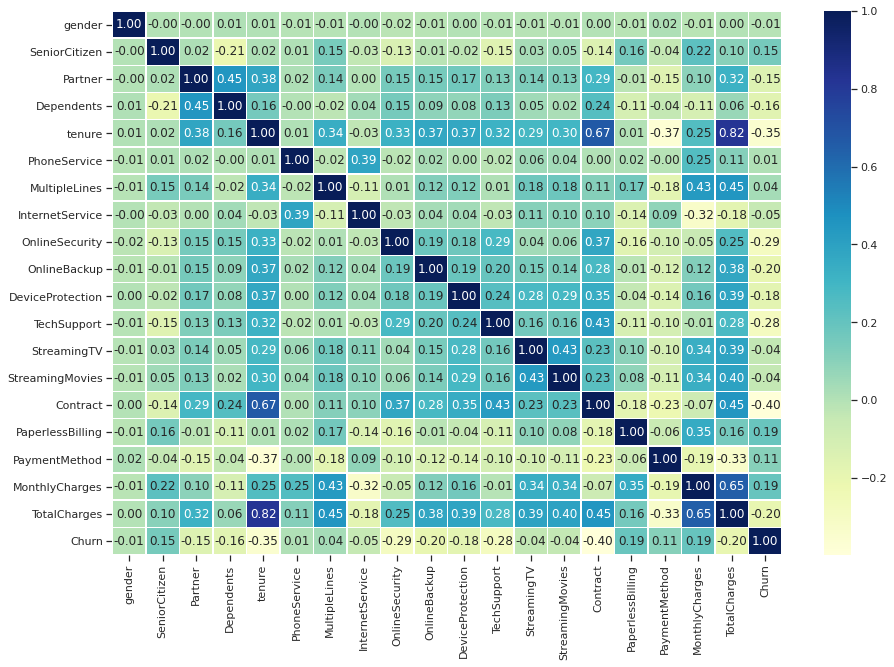

In [ ]:
#Plotting Correlation_Matrix

correlation_matrix = Chur.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");

**According to the correlation matrix, most columns do not have linear relationships to the churn label**

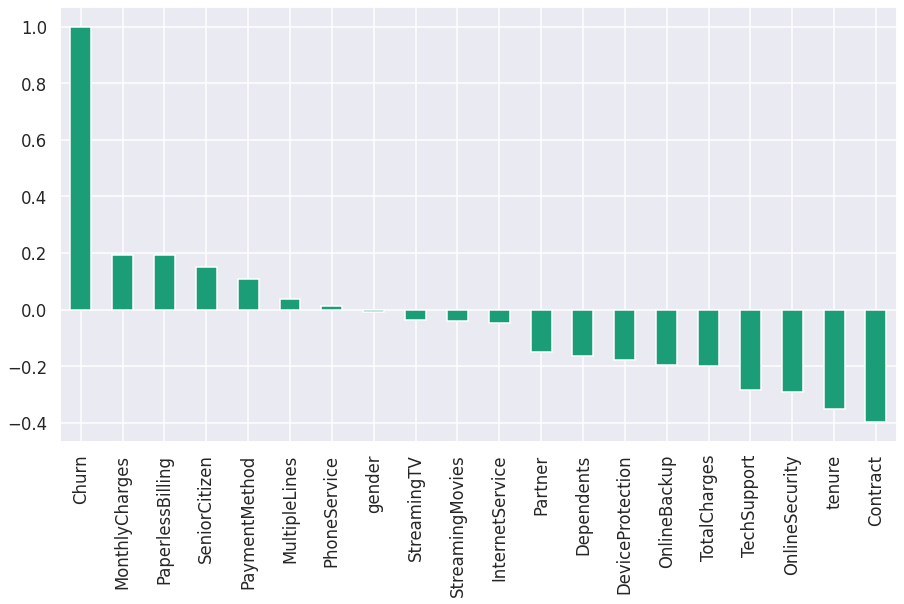

In [ ]:
# Checking again Correlation of "Churn" with other variables on a different plot
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(15,8))
Chur.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Observation :**

1. It can be seen from above correlation plot that, Contract_Month-to-month, Online security_No, Tech Support_No. etc. are positively correlated with Churn. While, on the other end of the plot, tenure, Contract_Two year, InternetService_No. etc. are negatively correlated with Churn.

2. Interestingly, services such as Online security, StreamingTV, OnlineBackup, TechSupport, etc. with InternetService_No seem to be negatively related to Churn. Need to explore the patterns more for the above correlations below before modelling and identifying the important variables.

In [ ]:
cor['Churn'].sort_values(ascending=False)  #Display Coorelation values of all attributes

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199428
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

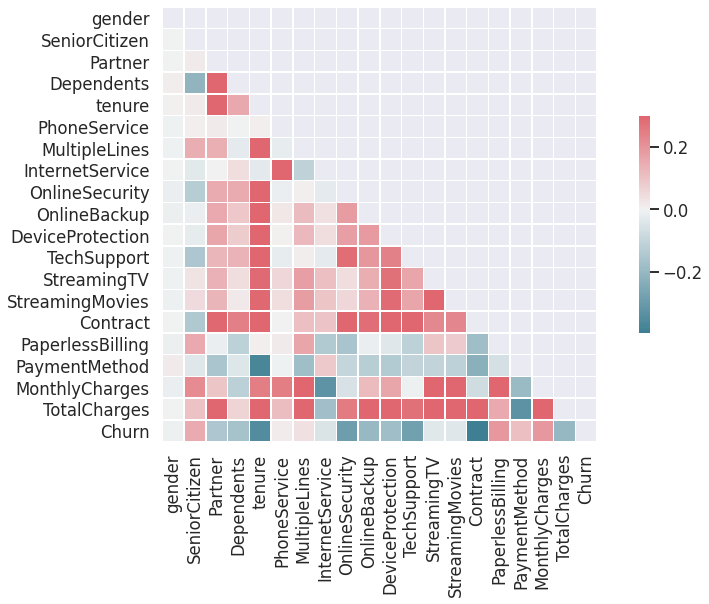

In [ ]:
# Generate a mask for the upper triangle
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# **Data Cleaning**

**1. Checking for Null Values in the Dataset**

In [ ]:
Chur.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**This is a very clean Dataset .**

**2. Checking for Outliers**

gender                  AxesSubplot(0.125,0.71587;0.133621x0.16413)
SeniorCitizen        AxesSubplot(0.285345,0.71587;0.133621x0.16413)
Partner               AxesSubplot(0.44569,0.71587;0.133621x0.16413)
Dependents           AxesSubplot(0.606034,0.71587;0.133621x0.16413)
tenure               AxesSubplot(0.766379,0.71587;0.133621x0.16413)
PhoneService           AxesSubplot(0.125,0.518913;0.133621x0.16413)
MultipleLines       AxesSubplot(0.285345,0.518913;0.133621x0.16413)
InternetService      AxesSubplot(0.44569,0.518913;0.133621x0.16413)
OnlineSecurity      AxesSubplot(0.606034,0.518913;0.133621x0.16413)
OnlineBackup        AxesSubplot(0.766379,0.518913;0.133621x0.16413)
DeviceProtection       AxesSubplot(0.125,0.321957;0.133621x0.16413)
TechSupport         AxesSubplot(0.285345,0.321957;0.133621x0.16413)
StreamingTV          AxesSubplot(0.44569,0.321957;0.133621x0.16413)
StreamingMovies     AxesSubplot(0.606034,0.321957;0.133621x0.16413)
Contract            AxesSubplot(0.766379,0.32195

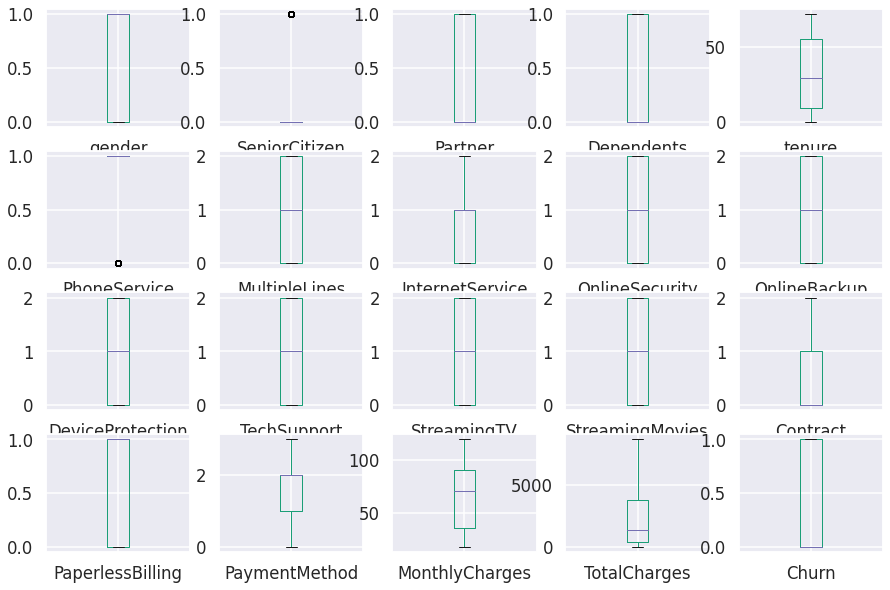

In [ ]:
#Plotting Outliers
Chur.plot(kind='box',subplots= True,layout=(4,5),figsize=(15,10))

**Observation :**
Looks like there are not much outliers present in the Dataset . lets check for ouliers using Zscore

In [ ]:
from scipy.stats import zscore

z=np.abs(zscore(Chur))
new_Chur = Chur [(z<3).all(axis=1)]

In [ ]:
new_Chur.shape

(6361, 20)

In [ ]:
Chur.shape

(7043, 20)

In [ ]:
#Check for Outliers % present in Dataste
((7043-6361)/7043)*100

9.683373562402386

**Observation :**
There would be a loss of 10% of Data

 **3.Checking for Skewness**

In [ ]:
new_Chur.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

In [ ]:
new_Chur.skew()

gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.301765
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges       -0.148971
Churn               1.053055
dtype: float64

**Observation :**
There is skewness present in some columns namely SeniorCitizen,Dependents, so lets remove it using powertransformation 

In [ ]:
#Using PowerTransformer to remove skewness

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer(method='yeo-johnson') ##using yeo-johnson method due to presence of negative skewness
for i in new_Chur.skew().index[1:]:
  if new_Chur.skew().loc[i]>0.55:
      new_Chur[i]=pt.fit_transform(new_Chur[i].values.reshape(-1,1))
  if new_Chur.skew().loc[i]<-0.55:
      mew_Chur[i]=pt.fit_transform(new_Chur[i].values.reshape(-1,1))
  else:
     new_Chur[i]=new_Chur[i]

# **Split Data and Target**

In [ ]:
#Preparing the Data
#Setting X and y-axis .
#Since we want to predict the Churn, we will drop the ‘Churn’ column.
from sklearn.model_selection import train_test_split

X = new_Chur.drop(['Churn'],axis=1)
y = new_Chur['Churn'].astype('int')

In [ ]:
X.head()

gender  SeniorCitizen  Partner  ...  PaymentMethod  MonthlyCharges  TotalCharges
1       1      -0.761506        0  ...              3           56.95      0.222457
2       1      -0.761506        0  ...              3           53.85     -1.400891
4       0      -0.761506        0  ...              2           70.70     -1.265537
5       0      -0.761506        0  ...              2           99.65     -0.379577
6       1      -0.761506        0  ...              1           89.10      0.247579

[5 rows x 19 columns]

In [ ]:
y.head()

1    0
2    1
4    1
5    1
6    0
Name: Churn, dtype: int64

**Scalling of Data**

In [ ]:
#Here we need to standardize them so that we can use the data properly. To do this, we need to apply the Scaling process to the data. Scikit-Learn's "StandardScaler" class can be used for this process:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [ ]:
X.head()

gender  SeniorCitizen  ...  MonthlyCharges  TotalCharges
0  0.992638      -0.441591  ...       -0.336617      0.222457
1  0.992638      -0.441591  ...       -0.438432     -1.400891
2 -1.007416      -0.441591  ...        0.114985     -1.265537
3 -1.007416      -0.441591  ...        1.065811     -0.379577
4  0.992638      -0.441591  ...        0.719309      0.247579

[5 rows x 19 columns]

**Treating Class Imbalance**

There was a class imbalance problem in target variable Churn . Hence we will remove class imbalance problem using SMOTE(Synthetic Minority Oversampling Technique) .

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 0)
X_sm,  y_sm = sm.fit_resample(X,y)

In [ ]:
X_sm.shape

(9324, 19)

In [ ]:
y_sm.shape

(9324,)

**Finding Best Random State**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

maxScore = 0
maxRS = 0

for i in range(1,1000):
  X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,test_size=.30,random_state=i)
  DT = DecisionTreeClassifier()
  DT.fit(X_train,y_train)
  pred = DT.predict(X_test)
  acc = accuracy_score(y_test,pred)
  if acc>maxScore:
    maxScore=acc
    maxRS=i
print('best accuracy score is :',maxScore*100,'with random_state:',maxRS)

best accuracy score is : 80.91493924231594 with random_state: 571


**Preparation of Test and Train Data**

The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [ ]:
from sklearn.model_selection import train_test_split  # Import "train_test_split" method

X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm, test_size=0.2, random_state=maxRS)
# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

# **Modelling**

In [ ]:
#Importing Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, auc,f1_score

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

**Defining a Function for plotting ROC_AUC Curve**

In [ ]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([-1, 0], [-1, 0], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

**Classification_Models**

In [ ]:
#Assinging objects for all classification models 
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
GBR = GradientBoostingClassifier()
KN = KNeighborsClassifier()
AD = AdaBoostClassifier()
SV = SVC()
GNB = GaussianNB()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy on Training Set: 77.34%

 Accuracy on Testing Set:
___________________________
79.36%


Confusion_Matrix
________________
[[727 202]
 [183 753]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       929
           1       0.79      0.80      0.80       936

    accuracy                           0.79      1865
   macro avg       0.79      0.79      0.79      1865
weighted avg       0.79      0.79      0.79      1865



F1_Score is :
_____________
0.7964040190375464


ROC_AUC Curve
_____________
ROC_AUC score : 0.7935245369987028
Plotting


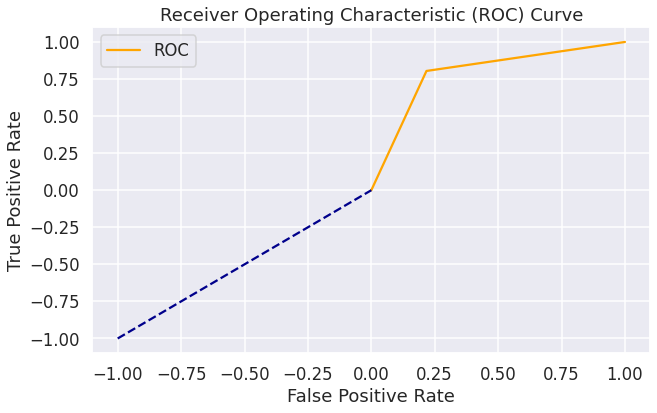



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 77.64%
Difference between accuracy_score and cross validation score is : 1.7181016925750043


------------------------------------------X---------------------------------------------


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
Accuracy on Training Set: 99.79%

 Accuracy on Testing Set:
___________________________
79.68%


Confusion_Matrix
________________
[[756 173]
 [206 730]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.79 

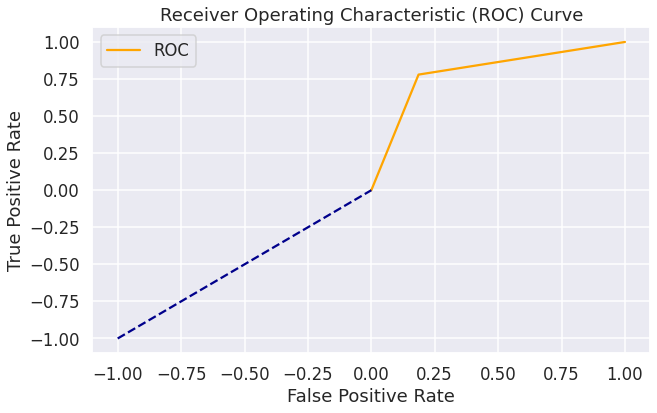



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 78.6%
Difference between accuracy_score and cross validation score is : 1.0741695336501351


------------------------------------------X---------------------------------------------


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy on Training Set: 99.79%

 Accuracy on Testing Set:
___________________________
87.24%


Confusion_Matrix
________________
[[814 115]
 [123 813]]


Clas

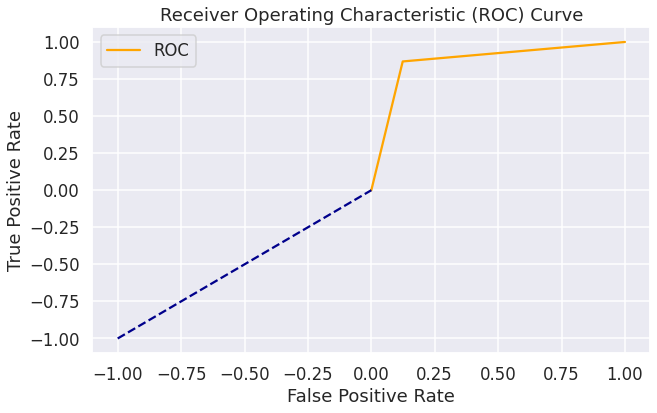



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 85.23%
Difference between accuracy_score and cross validation score is : 2.006397496231699


------------------------------------------X---------------------------------------------


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Accuracy o

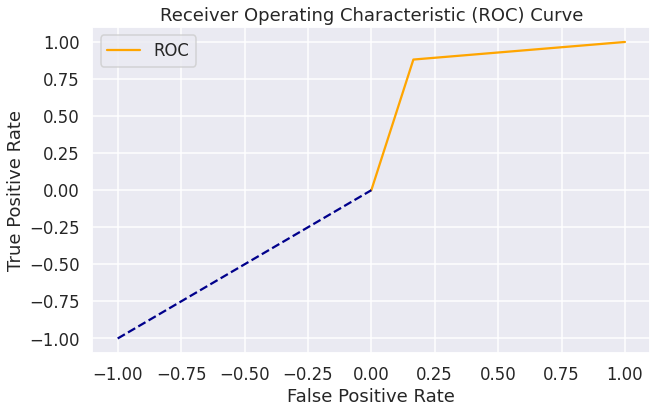



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 83.18%
Difference between accuracy_score and cross validation score is : 2.6072040870335655


------------------------------------------X---------------------------------------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
Accuracy on Training Set: 84.9%

 Accuracy on Testing Set:
___________________________
79.84%


Confusion_Matrix
________________
[[655 274]
 [102 834]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.87      0.71      0.78       929
           1       0.75      0.89      0.82       936

    accuracy                           0.80      1865
   macro avg       0.81      0.80      0.80      1865
weighted avg       0.81      0.80      0.80     

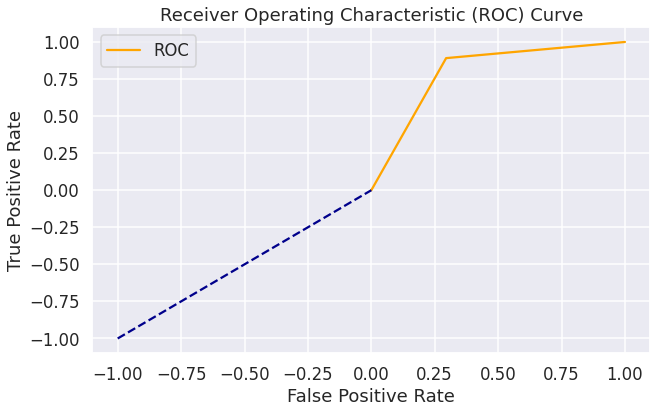



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 79.28%
Difference between accuracy_score and cross validation score is : 0.5597003762556056


------------------------------------------X---------------------------------------------


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
Accuracy on Training Set: 81.32%

 Accuracy on Testing Set:
___________________________
82.09%


Confusion_Matrix
________________
[[740 189]
 [145 791]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       929
           1       0.81      0.85      0.83       936

    accuracy                           0.82      1865
   macro avg       0.82      0.82      0.82      1865
weighted avg       0.82      0.82      0.82      1865



F1_Score is :
_____________
0.825678496868

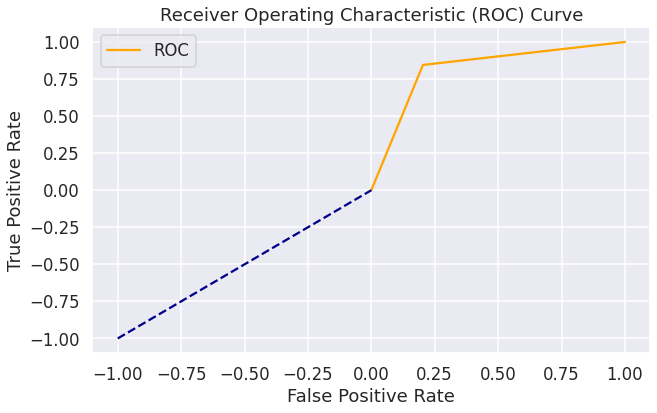



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 80.77%
Difference between accuracy_score and cross validation score is : 1.3207723020630766


------------------------------------------X---------------------------------------------


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy on Training Set: 83.51%

 Accuracy on Testing Set:
___________________________
82.52%


Confusion_Matrix
________________
[[738 191]
 [135 801]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       929
           1       0.81      0.86      0.83       936

    accuracy                           0.83      1865
   macro avg       0.83      0.83     

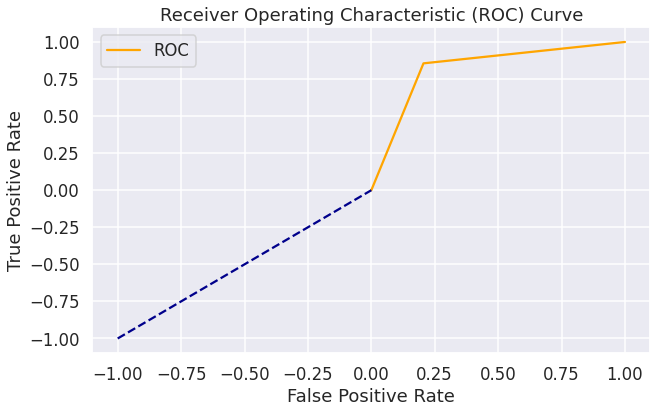



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 80.91%
Difference between accuracy_score and cross validation score is : 1.6103568099966594


------------------------------------------X---------------------------------------------


GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy on Training Set: 76.61%

 Accuracy on Testing Set:
___________________________
77.8%


Confusion_Matrix
________________
[[710 219]
 [195 741]]


Classification_Report
_____________________
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       929
           1       0.77      0.79      0.78       936

    accuracy                           0.78      1865
   macro avg       0.78      0.78      0.78      1865
weighted avg       0.78      0.78      0.78      1865



F1_Score is :
_____________
0.7816455696202531


ROC_AUC Curve
_____________
ROC_AUC score : 0.7779646573376391
Plotting


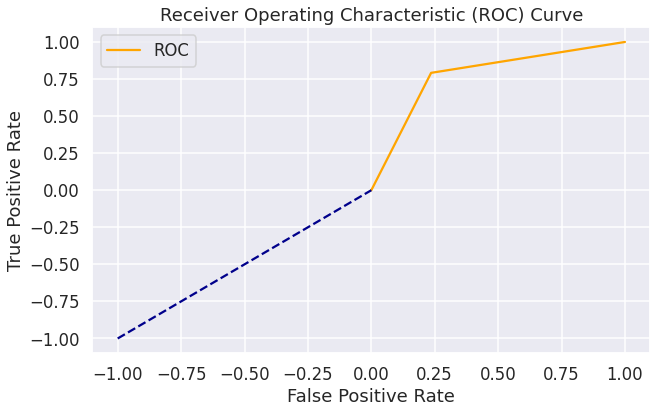



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 76.89%
Difference between accuracy_score and cross validation score is : 0.913978989517787


------------------------------------------X---------------------------------------------




In [ ]:
models = [LR,DT,RF,GBR,KN,AD,SV,GNB]

for i in models:
    print (i)
    i.fit(X_train,y_train)
    pred = i.predict(X_test)
    print("Accuracy on Training Set: {}%".format(round(i.score(X_train, y_train)*100, 2)))
    print('\n Accuracy on Testing Set:')
    print('___________________________')
    print("{}%".format(round(accuracy_score(y_test, pred)*100,2)))
    print('\n')
    print('Confusion_Matrix')
    print('________________')
    print(confusion_matrix(y_test, pred))
    print('\n')
    print('Classification_Report')
    print('_____________________')
    print(classification_report(y_test, pred))
    print('\n')
    print('F1_Score is :')
    print('_____________')
    print(f1_score(y_test,pred))
    print('\n')
    print('ROC_AUC Curve')
    print('_____________')
    print('ROC_AUC score :',roc_auc_score(y_test,pred))
    print('Plotting')
    fpr, tpr, thresholds = roc_curve(y_test,pred)
    plot_roc_curve(fpr, tpr)
    print('\n')
    print('Computing Cross_Validation Score')
    print('________________________________')
    cvs = cross_val_score(i,X_sm,y_sm,cv=5)
    print('Cross Validation Score of the model is :',"{}%".format(round(cvs.mean()*100,2)))
    print('Difference between accuracy_score and cross validation score is :',(accuracy_score(y_test,pred)*100)-(cvs.mean()*100))
    print('\n')
    print('------------------------------------------X---------------------------------------------')
    print('\n')

**Observation :**

1. We see classification model - RandomForestClassifier has the highest accuracy score of 87.24% while Naive-BayesClassifier has the lowest accuracy score of 77.8% .
2. But in KNeighbors_Classifier we see that difference between accuracy score and cross validation score is least among all i.e, 0.55 . Hence KNeighbors_Classifier is our best fitted Model .

**Hyper-Parameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter={'n_neighbors': np.arange(2,10),
           'weights': ['uniform', 'distance'],
           'n_jobs' : [-1,1],
           'algorithm' :['auto', 'ball_tree', 'kd_tree', 'brute']}

In [ ]:
GCV=GridSearchCV(KNeighborsClassifier(),parameter,cv=5)

In [ ]:
GCV.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_jobs': [-1, 1],
                         'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
GCV.best_params_

{'algorithm': 'auto', 'n_jobs': -1, 'n_neighbors': 2, 'weights': 'distance'}

In [ ]:
Final_mod = KNeighborsClassifier(algorithm='auto',n_jobs=-1,n_neighbors=2,weights='distance')
Final_mod.fit(X_train,y_train)
pred_KN=Final_mod.predict(X_test)
acc_final=accuracy_score(y_test,pred_KN)
print('Final_Accuracy is :')
print('___________________')
print(acc_final*100)

Final_Accuracy is :
___________________
82.19839142091153


**Our Model learnt almost 82.19% of accuracy .**

All metrices of our best fitted Model is :


Confusion_Matrix
________________
[[718 211]
 [121 815]]


F1_Score is :
_____________
0.8307849133537207


ROC_AUC Curve
_____________
ROC_AUC score : 0.8218002769267571
Plotting


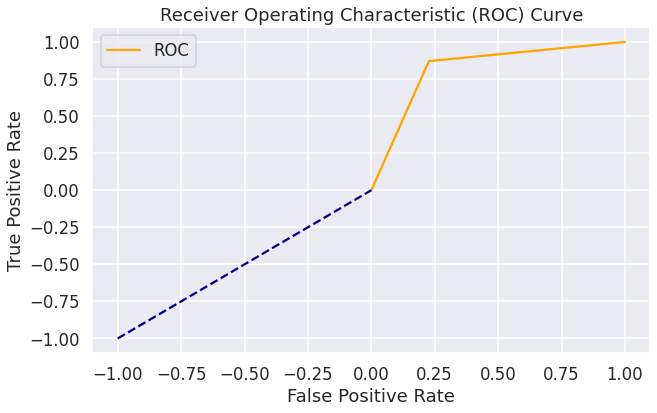



Computing Cross_Validation Score
________________________________
Cross Validation Score of the model is : 76.89%


------------------------------------------X---------------------------------------------




In [ ]:
    print('All metrices of our best fitted Model is :')
    print('\n')
    print('Confusion_Matrix')
    print('________________')
    print(confusion_matrix(y_test, pred_KN))
    print('\n')
    print('F1_Score is :')
    print('_____________')
    print(f1_score(y_test,pred_KN))
    print('\n')
    print('ROC_AUC Curve')
    print('_____________')
    print('ROC_AUC score :',roc_auc_score(y_test,pred_KN))
    print('Plotting')
    fpr, tpr, thresholds = roc_curve(y_test,pred_KN)
    plot_roc_curve(fpr, tpr)
    print('\n')
    print('Computing Cross_Validation Score')
    print('________________________________')
    cvs = cross_val_score(i,X_sm,y_sm,cv=5)
    print('Cross Validation Score of the model is :',"{}%".format(round(cvs.mean()*100,2)))
    print('\n')
    print('------------------------------------------X---------------------------------------------')
    print('\n')

Y Test  Prediction
0        1           1
1        1           1
2        0           0
3        0           0
4        1           1
5        0           0
6        0           0
7        0           1
8        0           1
9        0           1
10       0           0
11       0           1
12       0           0
13       0           0
14       1           0
15       1           1
16       1           0
17       1           1
18       1           1
19       0           0

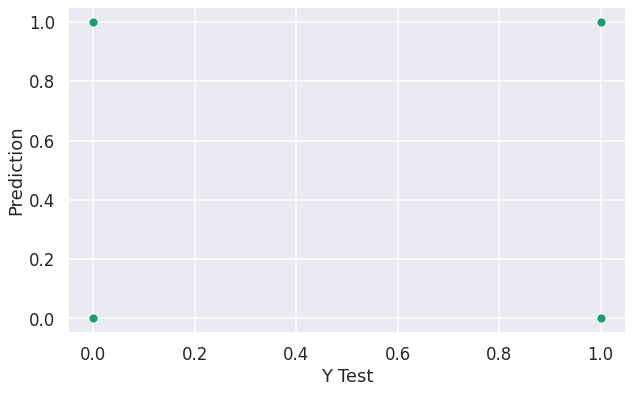

In [ ]:
Churn_Prediction = pd.DataFrame({'Y Test':y_test , 'Prediction':pred_KN},columns=['Y Test','Prediction'])
sns.scatterplot(x='Y Test',y='Prediction',data=Churn_Prediction,markers='o')
Churn_Prediction.head(20)

In [ ]:
# Saving the Predicted values in csv file

Churn_Prediction.to_csv('Churn_Analysis.csv')

In [ ]:
# Dumping Data in pickle file.

import joblib
joblib.dump(Final_mod,'Customer_Churn_Analysis.pkl')

['Customer_Churn_Analysis.pkl']